In [127]:
print("test")

test


In [128]:
%pip install requests
%pip install zeep
%pip install openml
%pip install seaborn
%pip install plotly

Note: you may need to restart the kernel to use updated packages.

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [129]:
import requests
from pprint import pprint
import pandas as pd
from zeep import Client
import logging
import openml
import sqlite3
import xml.etree.ElementTree as ET


# API Number of motor vehicles 

Below you can find the end points. We will use the TypedDataSet end point.
```
{
  "odata.metadata":"https://opendata.cbs.nl/ODataApi/OData/85235NED/$metadata","value":[
    {
      "name":"TableInfos","url":"https://opendata.cbs.nl/ODataApi/odata/85235NED/TableInfos"
    },{
      "name":"UntypedDataSet","url":"https://opendata.cbs.nl/ODataApi/odata/85235NED/UntypedDataSet"
    },{
      "name":"TypedDataSet","url":"https://opendata.cbs.nl/ODataApi/odata/85235NED/TypedDataSet"
    },{
      "name":"DataProperties","url":"https://opendata.cbs.nl/ODataApi/odata/85235NED/DataProperties"
    },{
      "name":"CategoryGroups","url":"https://opendata.cbs.nl/ODataApi/odata/85235NED/CategoryGroups"
    },{
      "name":"RegioS","url":"https://opendata.cbs.nl/ODataApi/odata/85235NED/RegioS"
    },{
      "name":"Perioden","url":"https://opendata.cbs.nl/ODataApi/odata/85235NED/Perioden"
    }
  ]
}
```

In [130]:
url = "https://opendata.cbs.nl/ODataApi/odata/85235NED/TypedDataSet"
response= requests.get(url)
users= response.json()
print(users)



{'odata.metadata': 'https://opendata.cbs.nl/ODataApi/OData/85235NED/$metadata#Cbs.OData.WebAPI.TypedDataSet', 'value': [{'ID': 0, 'RegioS': 'NL01  ', 'Perioden': '2019JJ00', 'TotaalWegvoertuigen_1': 11372065, 'TotaalMotorvoertuigen_2': 10199679, 'TotaalPersonenautoS_3': 8442982, 'PersonenautoSRelatief_4': 489, 'InBezitNatuurlijkePersonen_5': 7452085, 'InBezitNatuurlijkePersonenRelatief_6': 431, 'TotaalBedrijfsvoertuigen_7': 2283037, 'TotaalBedrijfsmotorvoertuigen_8': 1110651, 'TotaalAanhangwagensEnOpleggers_9': 1172386, 'TotaalBedrijfsmotorvoertuigen_10': 1110651, 'Bestelauto_11': 903005, 'VrachtautoExclTrekkerVoorOplegger_12': 61652, 'TrekkerVoorOplegger_13': 78788, 'SpeciaalVoertuig_14': 57693, 'Bus_15': 9513, 'TotaalAanhangwagensEnOpleggers_16': 1172386, 'Aanhangwagen_17': 1008412, 'Oplegger_18': 163974, 'TotaalMotorfietsen_19': 646046, 'MotorfietsenRelatief_20': 37}, {'ID': 1, 'RegioS': 'NL01  ', 'Perioden': '2020JJ00', 'TotaalWegvoertuigen_1': 11567203, 'TotaalMotorvoertuigen_2': 

##### In order to make the output above more readable print the following cell

In [131]:
#this will print the typed dataset in json format, so name value pairs
url = "https://opendata.cbs.nl/ODataApi/odata/85235NED/TypedDataSet"
posts = requests.get(url).json()

pprint (posts)
print("test")




{'odata.metadata': 'https://opendata.cbs.nl/ODataApi/OData/85235NED/$metadata#Cbs.OData.WebAPI.TypedDataSet',
 'value': [{'Aanhangwagen_17': 1008412,
            'Bestelauto_11': 903005,
            'Bus_15': 9513,
            'ID': 0,
            'InBezitNatuurlijkePersonenRelatief_6': 431,
            'InBezitNatuurlijkePersonen_5': 7452085,
            'MotorfietsenRelatief_20': 37,
            'Oplegger_18': 163974,
            'Perioden': '2019JJ00',
            'PersonenautoSRelatief_4': 489,
            'RegioS': 'NL01  ',
            'SpeciaalVoertuig_14': 57693,
            'TotaalAanhangwagensEnOpleggers_16': 1172386,
            'TotaalAanhangwagensEnOpleggers_9': 1172386,
            'TotaalBedrijfsmotorvoertuigen_10': 1110651,
            'TotaalBedrijfsmotorvoertuigen_8': 1110651,
            'TotaalBedrijfsvoertuigen_7': 2283037,
            'TotaalMotorfietsen_19': 646046,
            'TotaalMotorvoertuigen_2': 10199679,
            'TotaalPersonenautoS_3': 8442982,
   

In [132]:
# select columns by first selecting the "value" key from json format
# then specify the specific columns
dfposts = pd.DataFrame(posts["value"])[['Aanhangwagen_17',
            'Bestelauto_11',
            'Bus_15',
            'ID',
            'InBezitNatuurlijkePersonenRelatief_6',
            'InBezitNatuurlijkePersonen_5',
            'MotorfietsenRelatief_20',
            'Oplegger_18',
            'Perioden',
            'PersonenautoSRelatief_4',
            'RegioS',
            'SpeciaalVoertuig_14',
            'TotaalAanhangwagensEnOpleggers_16',
            'TotaalAanhangwagensEnOpleggers_9',
            'TotaalBedrijfsmotorvoertuigen_10',
            'TotaalBedrijfsmotorvoertuigen_8',
            'TotaalBedrijfsvoertuigen_7',
            'TotaalMotorfietsen_19',
            'TotaalMotorvoertuigen_2',
            'TotaalPersonenautoS_3',
            'TotaalWegvoertuigen_1',
            'TrekkerVoorOplegger_13',
            'VrachtautoExclTrekkerVoorOplegger_12']]
dfposts.head()



,Aanhangwagen_17,Bestelauto_11,Bus_15,ID,InBezitNatuurlijkePersonenRelatief_6,InBezitNatuurlijkePersonen_5,MotorfietsenRelatief_20,Oplegger_18,Perioden,PersonenautoSRelatief_4,...,TotaalAanhangwagensEnOpleggers_9,TotaalBedrijfsmotorvoertuigen_10,TotaalBedrijfsmotorvoertuigen_8,TotaalBedrijfsvoertuigen_7,TotaalMotorfietsen_19,TotaalMotorvoertuigen_2,TotaalPersonenautoS_3,TotaalWegvoertuigen_1,TrekkerVoorOplegger_13,VrachtautoExclTrekkerVoorOplegger_12
0,1008412,903005,9513,0,431,7452085,37,163974,2019JJ00,489,...,1172386,1110651,1110651,2283037,646046,10199679,8442982,11372065,78788,61652
1,1023980,927251,9699,1,434,7548770,38,168502,2020JJ00,493,...,1192482,1135943,1135943,2328425,654387,10374721,8584391,11567203,80118,61746
2,1029636,945433,9050,2,440,7683236,38,170014,2021JJ00,497,...,1199650,1151740,1151740,2351390,666597,10504756,8686419,11704406,79932,60831
3,1051486,974792,8532,3,444,7803950,39,177294,2022JJ00,502,...,1228780,1182857,1182857,2411637,677787,10688353,8827709,11917133,82436,60867
4,1069827,989841,8756,4,440,7842473,39,185262,2023JJ00,501,...,1255089,1201061,1201061,2456150,690724,10808892,8917107,12063981,85679,60811


In [133]:
dfposts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 23 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   Aanhangwagen_17                       119 non-null    int64 
 1   Bestelauto_11                         119 non-null    int64 
 2   Bus_15                                119 non-null    int64 
 3   ID                                    119 non-null    int64 
 4   InBezitNatuurlijkePersonenRelatief_6  119 non-null    int64 
 5   InBezitNatuurlijkePersonen_5          119 non-null    int64 
 6   MotorfietsenRelatief_20               119 non-null    int64 
 7   Oplegger_18                           119 non-null    int64 
 8   Perioden                              119 non-null    object
 9   PersonenautoSRelatief_4               119 non-null    int64 
 10  RegioS                                119 non-null    object
 11  SpeciaalVoertuig_14             

In [134]:
dfposts.describe(include="all")

,Aanhangwagen_17,Bestelauto_11,Bus_15,ID,InBezitNatuurlijkePersonenRelatief_6,InBezitNatuurlijkePersonen_5,MotorfietsenRelatief_20,Oplegger_18,Perioden,PersonenautoSRelatief_4,...,TotaalAanhangwagensEnOpleggers_9,TotaalBedrijfsmotorvoertuigen_10,TotaalBedrijfsmotorvoertuigen_8,TotaalBedrijfsvoertuigen_7,TotaalMotorfietsen_19,TotaalMotorvoertuigen_2,TotaalPersonenautoS_3,TotaalWegvoertuigen_1,TrekkerVoorOplegger_13,VrachtautoExclTrekkerVoorOplegger_12
count,1.190000e+02,1.190000e+02,119.000000,119.000000,119.000000,1.190000e+02,119.000000,119.00000,119,119.000000,...,1.190000e+02,1.190000e+02,1.190000e+02,1.190000e+02,119.000000,1.190000e+02,1.190000e+02,1.190000e+02,119.000000,119.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019JJ00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.854826e+05,1.713652e+05,1599.781513,59.000000,458.327731,1.371150e+06,41.445378,31314.02521,NaN,531.352941,...,2.167967e+05,2.084077e+05,2.084077e+05,4.252043e+05,119986.058824,1.885717e+06,1.557323e+06,2.102513e+06,14653.285714,10856.092437
std,2.359257e+05,2.222785e+05,2209.500400,34.496377,43.597953,1.791485e+06,6.256790,41848.47121,NaN,92.283424,...,2.769861e+05,2.701247e+05,2.701247e+05,5.464519e+05,155689.531752,2.460088e+06,2.034669e+06,2.735181e+06,19137.159198,14132.059518
min,2.181000e+04,2.361800e+04,51.000000,0.000000,375.000000,1.728080e+05,30.000000,2359.00000,NaN,421.000000,...,2.416900e+04,2.922200e+04,2.922200e+04,6.392300e+04,15091.000000,2.477690e+05,2.013010e+05,2.824700e+05,1414.000000,1156.000000
25%,6.106750e+04,4.746650e+04,367.000000,29.500000,422.500000,3.145290e+05,36.000000,4977.00000,NaN,494.500000,...,6.587250e+04,5.816600e+04,5.816600e+04,1.226150e+05,30465.500000,4.397930e+05,3.646235e+05,4.965140e+05,3261.000000,2796.000000
50%,1.131420e+05,1.111590e+05,901.000000,59.000000,469.000000,8.491200e+05,41.000000,16419.00000,NaN,525.000000,...,1.295610e+05,1.382770e+05,1.382770e+05,2.881580e+05,83721.000000,1.132392e+06,9.093020e+05,1.306028e+06,7841.000000,6062.000000
75%,1.834855e+05,1.717850e+05,1628.000000,88.500000,492.500000,1.504870e+06,45.500000,39000.00000,NaN,545.500000,...,2.208010e+05,2.096705e+05,2.096705e+05,4.280710e+05,121018.500000,1.981126e+06,1.656020e+06,2.177265e+06,17043.000000,12079.500000


In [135]:
dfposts.isnull().sum()

Aanhangwagen_17                         0
Bestelauto_11                           0
Bus_15                                  0
ID                                      0
InBezitNatuurlijkePersonenRelatief_6    0
InBezitNatuurlijkePersonen_5            0
MotorfietsenRelatief_20                 0
Oplegger_18                             0
Perioden                                0
PersonenautoSRelatief_4                 0
RegioS                                  0
SpeciaalVoertuig_14                     0
TotaalAanhangwagensEnOpleggers_16       0
TotaalAanhangwagensEnOpleggers_9        0
TotaalBedrijfsmotorvoertuigen_10        0
TotaalBedrijfsmotorvoertuigen_8         0
TotaalBedrijfsvoertuigen_7              0
TotaalMotorfietsen_19                   0
TotaalMotorvoertuigen_2                 0
TotaalPersonenautoS_3                   0
TotaalWegvoertuigen_1                   0
TrekkerVoorOplegger_13                  0
VrachtautoExclTrekkerVoorOplegger_12    0
dtype: int64

#### Since we want to use this data to portray the impact of cars in specific regions on the air quality, we choose to use the following attributes from this data source:
```
columns_vehicledb = ['Aanhangwagen_17',
            'Bestelauto_11',
            'Bus_15',
            'InBezitNatuurlijkePersonenRelatief_6',
            'InBezitNatuurlijkePersonen_5',
            'MotorfietsenRelatief_20',
            'Oplegger_18',
            'PersonenautoSRelatief_4',
            'SpeciaalVoertuig_14',
            'TotaalAanhangwagensEnOpleggers_16',
            'TotaalAanhangwagensEnOpleggers_9',
            'TotaalBedrijfsmotorvoertuigen_10',
            'TotaalBedrijfsmotorvoertuigen_8',
            'TotaalBedrijfsvoertuigen_7',
            'TotaalMotorfietsen_19',
            'TotaalMotorvoertuigen_2',
            'TotaalPersonenautoS_3',
            'TotaalWegvoertuigen_1',
            'TrekkerVoorOplegger_13',
            'VrachtautoExclTrekkerVoorOplegger_12']

```

In [136]:
print(dfposts["RegioS"].nunique(), "different regions")
print(dfposts["RegioS"].unique())
print(dfposts["RegioS"].value_counts())

17 different regions
['NL01  ' 'LD01  ' 'LD02  ' 'LD03  ' 'LD04  ' 'PV20  ' 'PV21  ' 'PV22  '
 'PV23  ' 'PV24  ' 'PV25  ' 'PV26  ' 'PV27  ' 'PV28  ' 'PV29  ' 'PV30  '
 'PV31  ']
RegioS
NL01      7
LD01      7
LD02      7
LD03      7
LD04      7
PV20      7
PV21      7
PV22      7
PV23      7
PV24      7
PV25      7
PV26      7
PV27      7
PV28      7
PV29      7
PV30      7
PV31      7
Name: count, dtype: int64


There are 17 different regios, divided in the following two categories: LD (landsdeel) and PV (provincies). We choose to primiraly focus on provinces due to data granularity. 

In [137]:
dfprovince = dfposts[dfposts["RegioS"].str.startswith("PV")]
print(dfprovince)

     Aanhangwagen_17  Bestelauto_11  Bus_15   ID  \
35             44354          31359      99   35   
36             45012          32179     291   36   
37             45677          33225     343   37   
38             46662          34112     346   38   
39             47653          34680     372   39   
..               ...            ...     ...  ...   
114            70317          52209     351  114   
115            72178          53705     332  115   
116            74049          54396     361  116   
117            74725          55128     362  117   
118            75962          56734     352  118   

     InBezitNatuurlijkePersonenRelatief_6  InBezitNatuurlijkePersonen_5  \
35                                    431                        251789   
36                                    436                        255316   
37                                    444                        260707   
38                                    450                        265561   


https://standaarden.overheid.nl/tooi/waardelijsten/expression?lijst_uri=https%3A%2F%2Fidentifier.overheid.nl%2Ftooi%2Fset%2Frwc_provincies_compleet%2F1

This website was used to create the encoded values

In [138]:
columns_vehicledb = ['Aanhangwagen_17',
            'Bestelauto_11',
            'Bus_15',
            'InBezitNatuurlijkePersonenRelatief_6',
            'InBezitNatuurlijkePersonen_5',
            'MotorfietsenRelatief_20',
            'Oplegger_18',
            'PersonenautoSRelatief_4',
            'SpeciaalVoertuig_14',
            'TotaalAanhangwagensEnOpleggers_16',
            'TotaalAanhangwagensEnOpleggers_9',
            'TotaalBedrijfsmotorvoertuigen_10',
            'TotaalBedrijfsmotorvoertuigen_8',
            'TotaalBedrijfsvoertuigen_7',
            'TotaalMotorfietsen_19',
            'TotaalMotorvoertuigen_2',
            'TotaalPersonenautoS_3',
            'TotaalWegvoertuigen_1',
            'TrekkerVoorOplegger_13',
            'VrachtautoExclTrekkerVoorOplegger_12']

pvencoding = {'PV20':'Groningen',
              'PV21':'Friesland',
              'PV22':'Drenthe',
              'PV23':'Overijssel',  
              'PV24':'Flevoland',
              'PV25':'Gelderland',
              'PV26':'Utrecht',
              'PV27':'Noord-Holland',
              'PV28':'Zuid-Holland',
              'PV29':'Zeeland',
              'PV30':'Noord-Brabant',
              'PV31':'Limburg'}


dfprovince = dfprovince.groupby('RegioS')[columns_vehicledb].sum().reset_index()
dfprovince["Sum"] = dfprovince[columns_vehicledb].sum(axis=1)
dfprovince['RegioS'] = dfprovince['RegioS'].astype(str).str.strip()
dfprovince['RegioS'] = dfprovince['RegioS'].map(pvencoding)
print(dfprovince[["RegioS","Sum"]])


           RegioS       Sum
0       Groningen  11936457
1       Friesland  14990976
2         Drenthe  11755668
3      Overijssel  25136738
4       Flevoland  12550586
5      Gelderland  43979534
6         Utrecht  27202822
7   Noord-Holland  47438165
8    Zuid-Holland  62190626
9         Zeeland   8732228
10  Noord-Brabant  57201144
11        Limburg  23560147


#### Check if this also contains the LD values

In [139]:
dftotal = dfprovince.groupby('RegioS')[columns_vehicledb].sum().sum()

dftotal["Sum"] = dftotal[columns_vehicledb].sum()

print(dftotal)

Aanhangwagen_17                           7357478
Bestelauto_11                             6797487
Bus_15                                      63458
InBezitNatuurlijkePersonenRelatief_6        38589
InBezitNatuurlijkePersonen_5             54388946
MotorfietsenRelatief_20                      3503
Oplegger_18                               1242123
PersonenautoSRelatief_4                     45252
SpeciaalVoertuig_14                        394020
TotaalAanhangwagensEnOpleggers_16         8599601
TotaalAanhangwagensEnOpleggers_9          8599601
TotaalBedrijfsmotorvoertuigen_10          8266837
TotaalBedrijfsmotorvoertuigen_8           8266837
TotaalBedrijfsvoertuigen_7               16866438
TotaalMotorfietsen_19                     4759447
TotaalMotorvoertuigen_2                  74800095
TotaalPersonenautoS_3                    61773811
TotaalWegvoertuigen_1                    83399696
TrekkerVoorOplegger_13                     581247
VrachtautoExclTrekkerVoorOplegger_12       430625


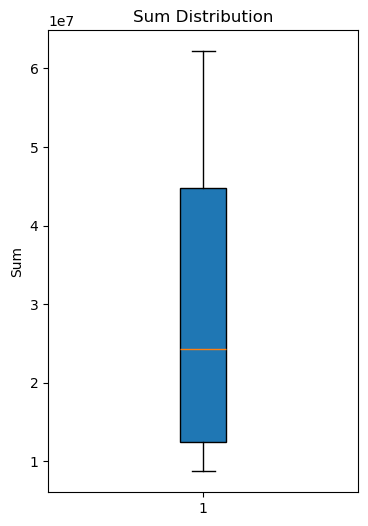

In [140]:
import matplotlib.pyplot as plt
plt.figure(figsize=(4,6))
sum = dfprovince['Sum'].dropna() # If you don't remove NANs, default matplotlib function will fail
plt.boxplot(sum, vert=True, patch_artist=True)
plt.title("Sum Distribution")
plt.ylabel("Sum")
plt.show()

Made this visualization code with Farheen.

In [141]:
%pip install --upgrade nbformat

In [142]:
import plotly.express as px


bar = px.bar(dfprovince, x='RegioS', y= 'Sum', title='Bar chart of sum of cars per region')
bar.update_layout(yaxis_title='Sum of cars', xaxis_title= "Region Code", barmode='group') 

bar.show()

##### Standardize numerical data below, so that this data could be used for the predictive part (machine learning algorithms, such as SVM, dbscan, etc.)

https://www.datacamp.com/tutorial/normalization-vs-standardization


In [143]:
from sklearn.preprocessing import StandardScaler

standardization = dfprovince[['Aanhangwagen_17',
            'Bestelauto_11',
            'Bus_15',
            'InBezitNatuurlijkePersonenRelatief_6',
            'InBezitNatuurlijkePersonen_5',
            'MotorfietsenRelatief_20',
            'Oplegger_18',
            'PersonenautoSRelatief_4',
            'SpeciaalVoertuig_14',
            'TotaalAanhangwagensEnOpleggers_16',
            'TotaalAanhangwagensEnOpleggers_9',
            'TotaalBedrijfsmotorvoertuigen_10',
            'TotaalBedrijfsmotorvoertuigen_8',
            'TotaalBedrijfsvoertuigen_7',
            'TotaalMotorfietsen_19',
            'TotaalMotorvoertuigen_2',
            'TotaalPersonenautoS_3',
            'TotaalWegvoertuigen_1',
            'TrekkerVoorOplegger_13',
            'VrachtautoExclTrekkerVoorOplegger_12']]


standardize = StandardScaler().fit_transform(standardization)

dfstandardization = pd.DataFrame(standardize, columns=standardization.columns)
print(dfstandardization)

    Aanhangwagen_17  Bestelauto_11    Bus_15  \
0         -0.826098      -0.964925 -0.580957   
1         -0.491041      -0.676733  0.872484   
2         -0.723266      -1.008951 -0.931738   
3          0.210462      -0.215500  0.309090   
4         -1.310117      -0.711399 -1.004122   
5          1.461661       0.782840 -0.493932   
6         -0.431911       0.090297  0.308059   
7          0.523144       1.021050  2.670520   
8          1.177683       1.695970  0.593468   
9         -1.131960      -1.141830 -0.797901   
10         1.852307       1.695805 -0.364220   
11        -0.310864      -0.566621 -0.580751   

    InBezitNatuurlijkePersonenRelatief_6  InBezitNatuurlijkePersonen_5  \
0                              -0.305425                     -0.884965   
1                               0.691308                     -0.751204   
2                               1.356838                     -0.893761   
3                               0.153884                     -0.228767   
4    

#### IMPORTANT: CHOOSE SAMPLING DURING THE PREDICTIVE PART. IT IS NOW NOT POSSIBLE TO CHOOSE THIS, BECAUSE THE SAMPLES NEEDS TO BE ALIGNED WITH PM2.5 PM10 AND NO2 DATA.

# API Luchtmeetnet NO2

In this part of the code, we will retrieve data from the luchtmeetnet api. We filter through the measurements using ?formula=NO2 , ?formula=PM10 and ?formula=PM25  

In [144]:
url_province = "https://api.luchtmeetnet.nl/open_api/stations"
posts_luchtmeetnet_province = requests.get(url_province).json()
pprint(posts_luchtmeetnet_province)


{'data': [{'location': 'Overschie-A13', 'number': 'NL01491'},
          {'location': 'Rotterdam-Maasvlakte', 'number': 'NL01497'},
          {'location': 'Rotterdam-HvHolland', 'number': 'NL01496'},
          {'location': 'Wijk aan Zee-Bosweg', 'number': 'NL49557'},
          {'location': 'Nistelrode-Gagelstraat', 'number': 'NL10248'},
          {'location': 'Ridderkerk-Voorweg', 'number': 'NL01912'},
          {'location': 'Meerssen- Beekerweg', 'number': 'NL50013'},
          {'location': 'Eijsden-Trichterweg', 'number': 'NL50012'},
          {'location': 'Rotterdam-Hoogvliet', 'number': 'NL01485'},
          {'location': 'Ridderkerk-A16', 'number': 'NL01489'},
          {'location': 'Zaandam-Wagenschotpad', 'number': 'NL49701'},
          {'location': 'Burgh-Haamstede', 'number': 'NL10320'},
          {'location': 'Zevenbergen-Galgenweg', 'number': 'NL53016'},
          {'location': 'Den Haag-Rebecquestraat', 'number': 'NL10404'},
          {'location': 'Den Haag-Amsterdamse Veerkad

In [145]:
dfposts_NO2_province = pd.DataFrame(posts_luchtmeetnet_province["data"])[['location','number']]
dfposts_NO2_province.head(10)

,location,number
0,Overschie-A13,NL01491
1,Rotterdam-Maasvlakte,NL01497
2,Rotterdam-HvHolland,NL01496
3,Wijk aan Zee-Bosweg,NL49557
4,Nistelrode-Gagelstraat,NL10248
5,Ridderkerk-Voorweg,NL01912
6,Meerssen- Beekerweg,NL50013
7,Eijsden-Trichterweg,NL50012
8,Rotterdam-Hoogvliet,NL01485
9,Ridderkerk-A16,NL01489


In [146]:
url = "https://api.luchtmeetnet.nl/open_api/measurements?formula=NO2" # get data from luchtmeetnet api and filter it so that only NO2 formulas will be retrieved
posts_luchtmeetnet_NO2 = requests.get(url).json()
#pprint(posts_luchtmeetnet_NO2)



In [147]:
dfposts_NO2 = pd.DataFrame(posts_luchtmeetnet_NO2["data"])[['formula',
           'station_number',
           'timestamp_measured',
           'value']]
print(dfposts_NO2.head(10))



  formula station_number         timestamp_measured  value
0     NO2        NL10230  2025-10-10T19:00:00+00:00  12.09
1     NO2        NL10938  2025-10-10T19:00:00+00:00   6.66
2     NO2        NL10617  2025-10-10T19:00:00+00:00   6.65
3     NO2        NL01912  2025-10-10T19:00:00+00:00  20.40
4     NO2        NL10444  2025-10-10T19:00:00+00:00   4.83
5     NO2        NL10738  2025-10-10T19:00:00+00:00  10.25
6     NO2        NL10818  2025-10-10T19:00:00+00:00   3.95
7     NO2        NL49680  2025-10-10T19:00:00+00:00  11.80
8     NO2        NL10449  2025-10-10T19:00:00+00:00  22.06
9     NO2        NL49703  2025-10-10T19:00:00+00:00   6.10


In [148]:
pprint(dfposts_NO2['value'] <= 0)
pprint(len(dfposts_NO2['value'] >= 0))

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Name: value, Length: 1000, dtype: bool
1000


In [149]:
dfposts_NO2_raw = dfposts_NO2.copy()

In [150]:
meanlocation = dfposts_NO2_raw.groupby('station_number')['value'].mean().reset_index()

print(meanlocation)

   station_number      value
0         NL01485  23.992308
1         NL01487  45.708333
2         NL01488  29.016667
3         NL01489  32.650000
4         NL01491  25.150000
..            ...        ...
76        NL49704  21.284615
77        NL50002  17.181818
78        NL50003  14.000000
79        NL50010  18.000000
80        NL54004  33.216667

[81 rows x 2 columns]


In [151]:
len(meanlocation)

81

In [152]:
import numpy as np


dfposts_NO2_clean= dfposts_NO2.copy()

dfposts_NO2_clean['value']= dfposts_NO2_clean['value'].mask(dfposts_NO2_clean['value'] < 0, np.nan)

print((dfposts_NO2_clean['value'] < 0).sum())


0


In [153]:
meanlocation_clean = dfposts_NO2_clean.groupby('station_number')['value'].mean().reset_index()

print(meanlocation_clean)

   station_number      value
0         NL01485  23.992308
1         NL01487  45.708333
2         NL01488  29.016667
3         NL01489  32.650000
4         NL01491  25.150000
..            ...        ...
76        NL49704  21.284615
77        NL50002  17.181818
78        NL50003  14.000000
79        NL50010  18.000000
80        NL54004  33.216667

[81 rows x 2 columns]


In [154]:
bar = px.bar(meanlocation, x='station_number' , y= 'value', title='Average µg/m³ NO2 per station')
bar.update_layout(yaxis_title='NO2 in µg/m³', xaxis_title= "Station numbers", barmode='group') 
#bar.add_shape(type='line', y0=40, y1=40, xref='paper', x0=0, x1=1, line_color='red')
bar.add_shape(
    legendrank=1,
    showlegend=True,
    type="line",
    xref="paper",
    line=dict(dash="5px", color='red'),
    x0=1,
    x1=0,
    y0=40,
    y1=40,
    name='Threshold of 40 µg/m³'
)

bar.show()

bar_NO2_clean = px.bar(meanlocation_clean, x='station_number' , y= 'value', title='Average µg/m³ NO2 per station')
bar_NO2_clean.update_layout(yaxis_title='NO2 in µg/m³', xaxis_title= "Station numbers", barmode='group') 
#bar.add_shape(type='line', y0=40, y1=40, xref='paper', x0=0, x1=1, line_color='red')
bar_NO2_clean.add_shape(
    legendrank=1,
    showlegend=True,
    type="line",
    xref="paper",
    line=dict(dash="5px", color='red'),
    x0=1,
    x1=0,
    y0=40,
    y1=40,
    name='Threshold of 40 µg/m³'
)

bar_NO2_clean.show()

In [155]:
NO2_pvencoding={'NL49703': 'Noord-Holland',
                  'NL49553': 'Noord-Holland',
                  'NL01493': 'Zuid-Holland',
                  'NL10404': 'Zuid-Holland',
                  'NL10318': 'Zeeland',
                  'NL01912': 'Zeeland',
                  'NL10742': 'Groningen',
                  'NL10538': 'Noord-Holland',
                  'NL01496': 'Zuid-Holland',
                  'NL01495': 'Zuid-Holland', 
                  'NL49007': 'Noord-Holland',
                  'NL10636': 'Utrecht',
                  'NL49564': 'Noord-Holland',
                  'NL10818': 'Overijssel',
                  'NL10550': 'Noord-Holland',
                  'NL49546': 'Noord-Holland',
                  'NL10136': 'Limburg',
                  'NL10235': 'Noord-Brabant',
                  'NL01913': 'Zeeland',
                  'NL10918': 'Friesland',
                  'NL01487': 'Zuid-Holland',
                  'NL10639': 'Utrecht',
                  'NL01497': 'Zeeland',
                  'NL10644': 'Utrecht',
                  'NL10633': 'Utrecht',
                  'NL10741': 'Gelderland',
                  'NL10437': 'Zeeland',
                  'NL10247':'Noord-Brabant', 
                  'NL10445':'Zeeland',
                  'NL10934': 'Friesland',
                  'NL01494': 'Zuid-Holland',
                  'NL10449': 'Zuid-Holland',
                  'NL49017': 'Noord-Holland',
                  'NL49551': 'Noord-Holland',
                  'NL10617': 'Flevoland', 
                  'NL10442': 'Zuid-Holland',
                  'NL10446': 'Zuid-Holland',
                  'NL49565': 'Noord-Holland',
                  'NL10418':'Zuid-Holland',
                  'NL10138': 'Limburg',
                  'NL10450': 'Zuid-Holland',
                  'NL10929': 'Drenthe',
                  'NL49561': 'Noord-Holland', 
                  'NL01485': 'Zuid-Holland',
                  'NL49003': 'Noord-Holland',
                  'NL10246': 'Noord-Brabant', 
                  'NL10133': 'Limburg',
                  'NL49020': 'Noord-Holland', 
                  'NL10444': 'Zuid-Holland',  
                  'NL10738': 'Gelderland',
                  'NL10107': 'Groningen',
                  'NL49680': 'Flevoland', 
                  'NL10643': 'Zuid-Holland', 
                  'NL10248': 'Noord-Brabant', 
                  'NL10240': 'Noord-Holland', 
                  'NL10230': 'Noord-Brabant',
                  'NL10131': 'Limburg', 
                  'NL49021': 'Noord-Holland',
                  'NL10938': 'Zuid-Holland',
                  'NL49019': 'Noord-Holland',
                  'NL49014': 'Noord-Holland',
                  'NL10641': 'Utrecht', 
                  'NL01491': 'Zuid-Holland',
                  'NL10236': 'Noord-Brabant',
                  'NL10241': 'Noord-Brabant',
                  'NL49701': 'Noord-Holland',
                  'NL49012': 'Noord-Holland', 
                  'NL10722': 'Gelderland',
                  'NL49704':'Noord-Holland',
                  'NL10807': 'Overijssel',
                  'NL01488': 'Zuid-Holland', 
                  'NL10301': 'Groningen',
                  'NL10937': 'Groningen',
                  'NL49002': 'Noord-Holland',
                  'NL50010': 'Limburg',
                  'NL50002': 'Limburg', 
                  'NL50003': 'Limburg',
                  'NL54004':'Gelderland',
                  'NL01489': 'Zuid-Holland',
                  'NL49022': 'Noord-Holland',
                  'NL10237': 'Noord-Brabant'}

dfposts_NO2['RegioS']  = dfposts_NO2['station_number'].map(NO2_pvencoding)
meanprovince = dfposts_NO2.groupby('RegioS')['value'].mean().reset_index()

print(meanprovince)


           RegioS      value
0         Drenthe   2.738462
1       Flevoland  11.441250
2       Friesland   2.316000
3      Gelderland  20.313800
4       Groningen  11.744792
5         Limburg  14.619512
6   Noord-Brabant  15.521753
7   Noord-Holland  16.199094
8      Overijssel   4.932800
9         Utrecht  14.071429
10        Zeeland  12.530270
11   Zuid-Holland  19.806861


In [156]:
print(meanprovince)

           RegioS      value
0         Drenthe   2.738462
1       Flevoland  11.441250
2       Friesland   2.316000
3      Gelderland  20.313800
4       Groningen  11.744792
5         Limburg  14.619512
6   Noord-Brabant  15.521753
7   Noord-Holland  16.199094
8      Overijssel   4.932800
9         Utrecht  14.071429
10        Zeeland  12.530270
11   Zuid-Holland  19.806861


In [157]:
dfposts_NO2_clean['RegioS']  = dfposts_NO2_clean['station_number'].map(NO2_pvencoding)
meanprovince_clean = dfposts_NO2_clean.groupby('RegioS')['value'].mean().reset_index()

print(meanprovince_clean)

           RegioS      value
0         Drenthe   2.738462
1       Flevoland  11.441250
2       Friesland   2.316000
3      Gelderland  20.313800
4       Groningen  11.744792
5         Limburg  14.619512
6   Noord-Brabant  15.521753
7   Noord-Holland  16.199094
8      Overijssel   4.932800
9         Utrecht  14.071429
10        Zeeland  12.530270
11   Zuid-Holland  19.806861


### Note for visualization team: add legend for the red line which represent the threshold.

In [158]:
import plotly.express as px
import plotly.graph_objects as go


bar = px.bar(meanlocation, x=NO2_pvencoding, y= 'value', title='total µg/m³ NO2 per region')
bar.update_layout(yaxis_title='NO2 in µg/m³', xaxis_title= "Station numbers", barmode='group') 
#bar.add_shape(type='line', y0=40, y1=40, xref='paper', x0=0, x1=1, line_color='red')
bar.add_shape(
    legendrank=1,
    showlegend=True,
    type="line",
    xref="paper",
    line=dict(dash="5px", color='red'),
    x0=1,
    x1=0,
    y0=40,
    y1=40,
    name='Threshold of 40 µg/m³'
)

bar.show()

In [159]:
print(NO2_pvencoding)
print(dfposts_NO2['RegioS'])
dfposts_NO2.info()

{'NL49703': 'Noord-Holland', 'NL49553': 'Noord-Holland', 'NL01493': 'Zuid-Holland', 'NL10404': 'Zuid-Holland', 'NL10318': 'Zeeland', 'NL01912': 'Zeeland', 'NL10742': 'Groningen', 'NL10538': 'Noord-Holland', 'NL01496': 'Zuid-Holland', 'NL01495': 'Zuid-Holland', 'NL49007': 'Noord-Holland', 'NL10636': 'Utrecht', 'NL49564': 'Noord-Holland', 'NL10818': 'Overijssel', 'NL10550': 'Noord-Holland', 'NL49546': 'Noord-Holland', 'NL10136': 'Limburg', 'NL10235': 'Noord-Brabant', 'NL01913': 'Zeeland', 'NL10918': 'Friesland', 'NL01487': 'Zuid-Holland', 'NL10639': 'Utrecht', 'NL01497': 'Zeeland', 'NL10644': 'Utrecht', 'NL10633': 'Utrecht', 'NL10741': 'Gelderland', 'NL10437': 'Zeeland', 'NL10247': 'Noord-Brabant', 'NL10445': 'Zeeland', 'NL10934': 'Friesland', 'NL01494': 'Zuid-Holland', 'NL10449': 'Zuid-Holland', 'NL49017': 'Noord-Holland', 'NL49551': 'Noord-Holland', 'NL10617': 'Flevoland', 'NL10442': 'Zuid-Holland', 'NL10446': 'Zuid-Holland', 'NL49565': 'Noord-Holland', 'NL10418': 'Zuid-Holland', 'NL10

In [160]:
import plotly.express as px
import plotly.graph_objects as go

pv = ['Groningen', 'Friesland', 'Drenthe', 'Overijssel', 'Gelderland', 'Flevoland',
      'Utrecht', 'Noord-Holland', 'Zuid-Holland', 'Noord-Brabant', 'Limburg', 'Zeeland' ]

pv_mean = meanprovince[meanprovince['RegioS'].isin(pv)]
bar = px.bar(meanprovince, x='RegioS' , y= dfposts_NO2.groupby('RegioS')['value'].mean(), title='Average µg/m³ NO2 per Region')
bar.update_layout(yaxis_title='NO2 in µg/m³', xaxis_title= "Station numbers", barmode='group') 
#bar.add_shape(type='line', y0=40, y1=40, xref='paper', x0=0, x1=1, line_color='red')
bar.add_shape(
    legendrank=1,
    showlegend=True,
    type="line",
    xref="paper",
    line=dict(dash="5px", color='red'),
    x0=1,
    x1=0,
    y0=40,
    y1=40,
    name='Threshold of 40 µg/m³'
)

bar.show()


pv_mean_clean = meanprovince_clean[meanprovince_clean['RegioS'].isin(pv)]
bar_cleanno2 = px.bar(meanprovince_clean, x='RegioS' , y= dfposts_NO2_clean.groupby('RegioS')['value'].mean(), title='Average µg/m³ NO2 per Region')
bar_cleanno2.update_layout(yaxis_title='NO2 in µg/m³', xaxis_title= "Station numbers", barmode='group') 
#bar.add_shape(type='line', y0=40, y1=40, xref='paper', x0=0, x1=1, line_color='red')
bar_cleanno2.add_shape(
    legendrank=1,
    showlegend=True,
    type="line",
    xref="paper",
    line=dict(dash="5px", color='red'),
    x0=1,
    x1=0,
    y0=40,
    y1=40,
    name='Threshold of 40 µg/m³'
)

bar_cleanno2.show()

In [161]:
dfposts_NO2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   formula             1000 non-null   object 
 1   station_number      1000 non-null   object 
 2   timestamp_measured  1000 non-null   object 
 3   value               1000 non-null   float64
 4   RegioS              1000 non-null   object 
dtypes: float64(1), object(4)
memory usage: 39.2+ KB


In [162]:
print(dfposts_NO2["station_number"].isna().sum())
print(dfposts_NO2["station_number"].nunique(), "station points")
print(dfposts_NO2["station_number"].unique())
print(dfposts_NO2["station_number"].value_counts())

0
81 station points
['NL10230' 'NL10938' 'NL10617' 'NL01912' 'NL10444' 'NL10738' 'NL10818'
 'NL49680' 'NL10449' 'NL49703' 'NL10445' 'NL10741' 'NL01493' 'NL49561'
 'NL01488' 'NL10246' 'NL10442' 'NL10722' 'NL49020' 'NL10538' 'NL10133'
 'NL49021' 'NL49012' 'NL10404' 'NL01487' 'NL10131' 'NL10636' 'NL49017'
 'NL10248' 'NL54004' 'NL49565' 'NL10418' 'NL01496' 'NL10929' 'NL10807'
 'NL10633' 'NL01495' 'NL10237' 'NL10301' 'NL49014' 'NL49546' 'NL10918'
 'NL10236' 'NL49564' 'NL10639' 'NL49003' 'NL10550' 'NL10641' 'NL49704'
 'NL01489' 'NL10437' 'NL01913' 'NL10934' 'NL10450' 'NL10235' 'NL10136'
 'NL49551' 'NL10937' 'NL01491' 'NL10241' 'NL10240' 'NL10247' 'NL10318'
 'NL10138' 'NL49007' 'NL49701' 'NL10644' 'NL49002' 'NL10446' 'NL49022'
 'NL01494' 'NL01485' 'NL49553' 'NL10643' 'NL10107' 'NL01497' 'NL49019'
 'NL10742' 'NL50002' 'NL50010' 'NL50003']
station_number
NL10444    13
NL10442    13
NL01912    13
NL10741    13
NL01493    13
           ..
NL49019    12
NL10742    12
NL50002    11
NL50010    11
NL

In [163]:
dfposts_NO2.describe(include="all")

,formula,station_number,timestamp_measured,value,RegioS
count,1000,1000,1000,1000.000000,1000
unique,1,81,13,NaN,12
top,NO2,NL10444,2025-10-10T18:00:00+00:00,NaN,Noord-Holland
freq,1000,13,81,NaN,276
mean,NaN,NaN,NaN,15.476880,NaN
std,NaN,NaN,NaN,10.598723,NaN
min,NaN,NaN,NaN,0.900000,NaN
25%,NaN,NaN,NaN,7.777500,NaN
50%,NaN,NaN,NaN,13.030000,NaN
75%,NaN,NaN,NaN,21.022500,NaN


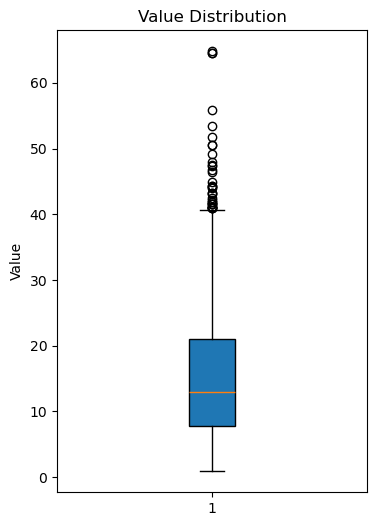

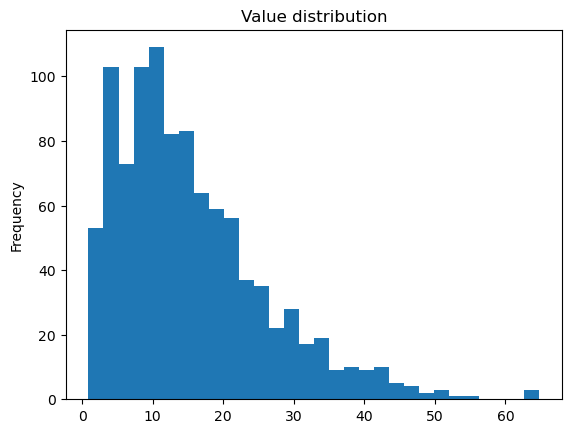

In [164]:
plt.figure(figsize=(4,6))
values = dfposts_NO2['value'].dropna() # If you don't remove NANs, default matplotlib function will fail
plt.boxplot(values, vert=True, patch_artist=True)
plt.title("Value Distribution")
plt.ylabel("Value")
plt.show()

dfposts_NO2['value'].plot(kind='hist', bins=30, title='Value distribution')
plt.show()



In [165]:
!pip install seaborn

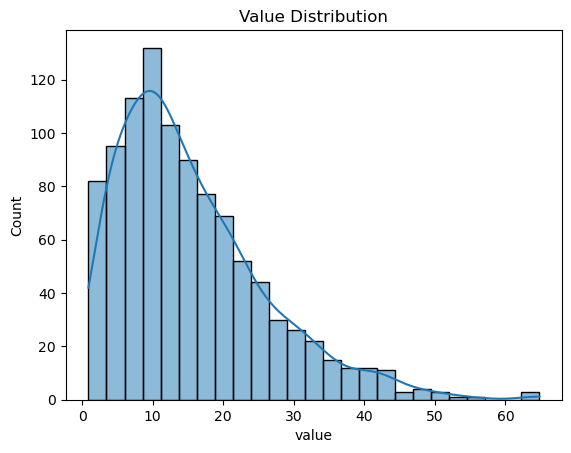

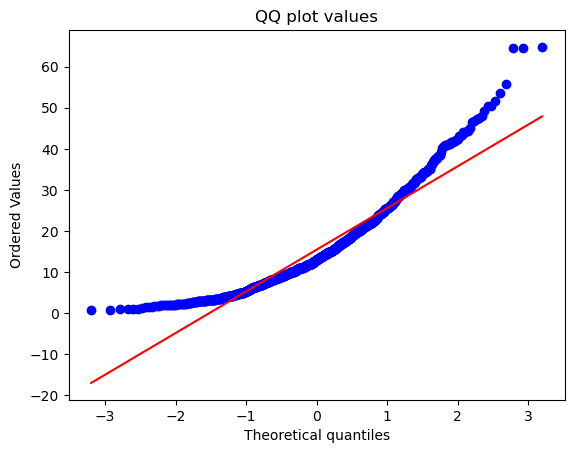

In [166]:
import scipy.stats as stats
import seaborn as sns 

sns.histplot(values, kde=True)
plt.title("Value Distribution")
plt.show()

stats.probplot(values, dist="norm", plot=plt)
plt.title("QQ plot values")
plt.show()

In [167]:
print(values.skew())


1.2185868877978687


In [168]:
c = abs(values.min())

In [169]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt



shift = values + c + 0.001
log_x = np.log(shift)  
print(log_x)



0      2.564257
1      2.023003
2      2.021680
3      3.058754
4      1.745890
         ...   
995    3.788747
996    3.723305
997    3.220514
998    3.205223
999    3.732920
Name: value, Length: 1000, dtype: float64


In [170]:
log_x.skew()

np.float64(-0.359357704007852)

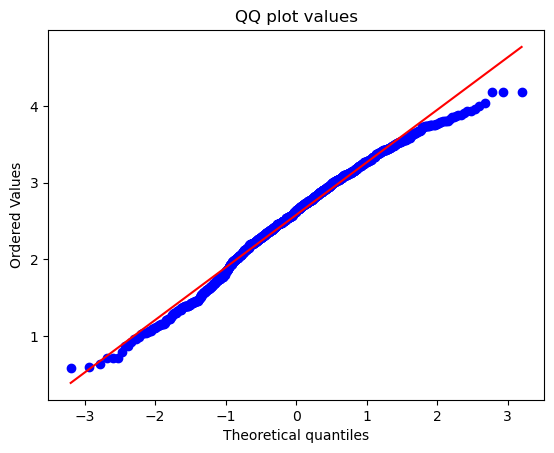

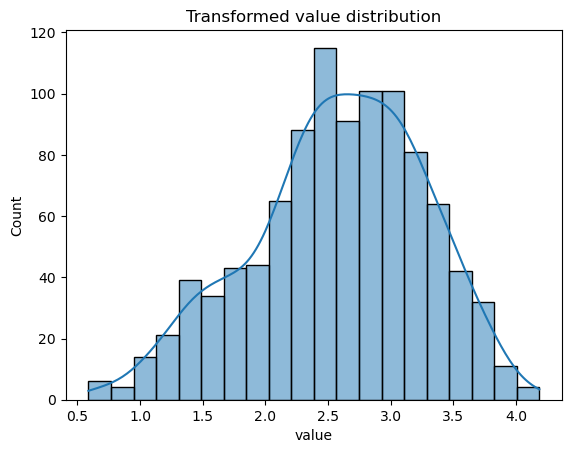

In [171]:
stats.probplot(log_x, dist="norm", plot=plt)
plt.title("QQ plot values")
plt.show()

sns.histplot(log_x,kde=True)
plt.title("Transformed value distribution")
plt.show()


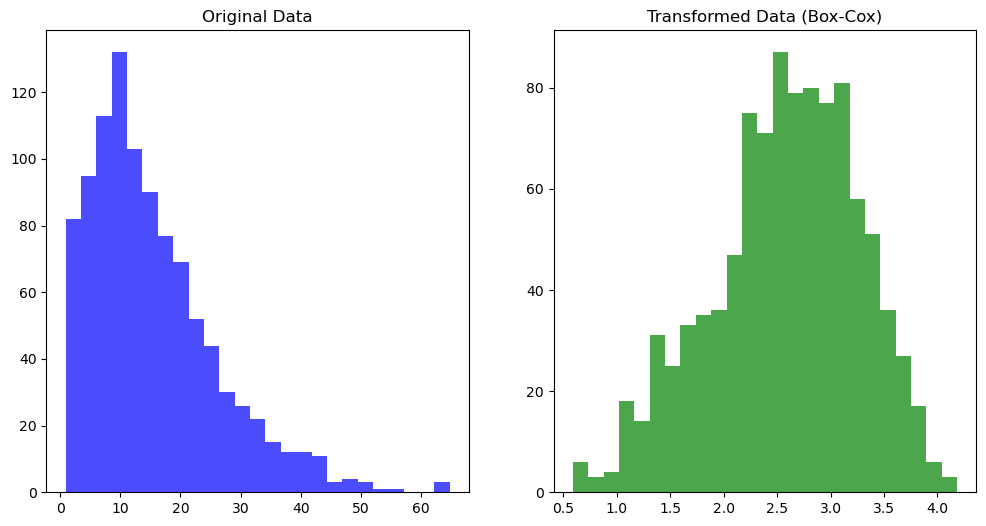

In [172]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(values, bins=25, color='blue', alpha=0.7)
plt.title('Original Data')

plt.subplot(1, 2, 2)
plt.hist(log_x, bins=25, color='green', alpha=0.7)
plt.title('Transformed Data (Box-Cox)')

plt.show()

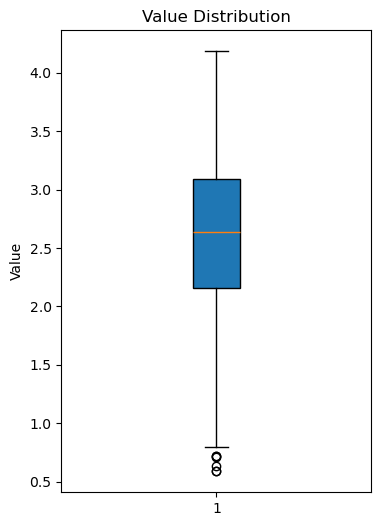

In [173]:
plt.figure(figsize=(4,6))
plt.boxplot(log_x, vert=True, patch_artist=True)
plt.title("Value Distribution")
plt.ylabel("Value")
plt.show()

For the predicition part, we need to use the log_x data. 

In [174]:
print(meanprovince)
print(dftotal)

print(meanprovince['value'].mean())


           RegioS      value
0         Drenthe   2.738462
1       Flevoland  11.441250
2       Friesland   2.316000
3      Gelderland  20.313800
4       Groningen  11.744792
5         Limburg  14.619512
6   Noord-Brabant  15.521753
7   Noord-Holland  16.199094
8      Overijssel   4.932800
9         Utrecht  14.071429
10        Zeeland  12.530270
11   Zuid-Holland  19.806861
Aanhangwagen_17                           7357478
Bestelauto_11                             6797487
Bus_15                                      63458
InBezitNatuurlijkePersonenRelatief_6        38589
InBezitNatuurlijkePersonen_5             54388946
MotorfietsenRelatief_20                      3503
Oplegger_18                               1242123
PersonenautoSRelatief_4                     45252
SpeciaalVoertuig_14                        394020
TotaalAanhangwagensEnOpleggers_16         8599601
TotaalAanhangwagensEnOpleggers_9          8599601
TotaalBedrijfsmotorvoertuigen_10          8266837
TotaalBedrijfsmotorvoer

# NOTE: USE PREPROCESSED DATA INSTEAD OF USING THE DATA DIRECTLY from the apis

In [175]:

dfcorrelation = pd.merge(meanprovince, dfprovince, on='RegioS')

correlation = dfcorrelation[['value', 'Sum']].corr()
corr_matrix = go.Figure(data=go.Heatmap(
        z=correlation.values,
        x=correlation.columns,
        y=correlation.index,
        text=correlation.values, #Show the values in the heatmap
        texttemplate="%{text:.2f}",
        colorscale='Viridis')) #Create the heatmap figure

corr_matrix.show()

# API Luchtmeetnet PM2.5

In [176]:
url = "https://api.luchtmeetnet.nl/open_api/measurements?formula=PM25" # get data from luchtmeetnet api and filter it so that only PM25 formulas will be retrieved
posts_luchtmeetnet_PM25 = requests.get(url).json()
#pprint(posts_luchtmeetnet_PM25)


In [177]:
dfposts_PM25 = pd.DataFrame(posts_luchtmeetnet_PM25["data"])[['formula',
           'station_number',
           'timestamp_measured',
           'value']]
print(dfposts_PM25.head(10))



  formula station_number         timestamp_measured  value
0    PM25        NL49007  2025-10-10T19:00:00+00:00  11.90
1    PM25        NL10131  2025-10-10T19:00:00+00:00  14.28
2    PM25        NL49557  2025-10-10T19:00:00+00:00   4.80
3    PM25        NL01913  2025-10-10T19:00:00+00:00  14.00
4    PM25        NL01491  2025-10-10T19:00:00+00:00   9.20
5    PM25        NL49016  2025-10-10T19:00:00+00:00   5.60
6    PM25        NL49551  2025-10-10T19:00:00+00:00   5.90
7    PM25        NL01495  2025-10-10T19:00:00+00:00   6.70
8    PM25        NL01489  2025-10-10T19:00:00+00:00   8.70
9    PM25        NL10248  2025-10-10T19:00:00+00:00  15.53


In [178]:
meanlocation_PM25 = dfposts_PM25.groupby('station_number')['value'].mean().reset_index()

print(meanlocation_PM25)

   station_number      value
0         NL01485   8.025000
1         NL01487  10.000000
2         NL01488   8.162500
3         NL01489   8.943750
4         NL01491   8.662500
..            ...        ...
58        NL50010  13.466667
59        NL50011  13.916667
60        NL50012  15.600000
61        NL54004   9.915000
62        NL54010   9.765625

[63 rows x 2 columns]


In [179]:
print(dfposts_PM25["station_number"].isna().sum())
print(dfposts_PM25["station_number"].nunique(), "station points")
print(dfposts_PM25["station_number"].unique())
print(dfposts_PM25["station_number"].value_counts())

0
63 station points
['NL49007' 'NL10131' 'NL49557' 'NL01913' 'NL01491' 'NL49016' 'NL49551'
 'NL01495' 'NL01489' 'NL10248' 'NL01487' 'NL10636' 'NL49017' 'NL01497'
 'NL10937' 'NL54004' 'NL01488' 'NL10934' 'NL54010' 'NL49572' 'NL10240'
 'NL01496' 'NL49980' 'NL49561' 'NL10418' 'NL49553' 'NL10821' 'NL49556'
 'NL49680' 'NL10641' 'NL49573' 'NL10138' 'NL49570' 'NL10247' 'NL01912'
 'NL10938' 'NL10449' 'NL10738' 'NL10643' 'NL49014' 'NL01493' 'NL49704'
 'NL10644' 'NL10741' 'NL10444' 'NL10742' 'NL10450' 'NL49003' 'NL01494'
 'NL01485' 'NL10538' 'NL49701' 'NL10136' 'NL10241' 'NL49012' 'NL10404'
 'NL10230' 'NL49703' 'NL50011' 'NL50010' 'NL50012' 'NL50003' 'NL50007']
station_number
NL10131    17
NL49551    17
NL01495    17
NL10418    17
NL49680    17
           ..
NL50010    15
NL50007    15
NL50012    15
NL50011    12
NL54004     6
Name: count, Length: 63, dtype: int64


In [180]:
import numpy as np
uniqueNO2= dfposts_NO2['station_number'].unique()
print(uniqueNO2)

uniquePM25= dfposts_PM25['station_number'].unique()
print(uniquePM25)

intersection = np.intersect1d(uniqueNO2, uniquePM25)

print(len(intersection))

differenceno2 = np.setdiff1d(uniqueNO2, uniquePM25)
differencepm25 = np.setdiff1d(uniquePM25, uniqueNO2)
print(differencepm25, 'PM25 only')
print(differenceno2, 'NO2 only')


['NL10230' 'NL10938' 'NL10617' 'NL01912' 'NL10444' 'NL10738' 'NL10818'
 'NL49680' 'NL10449' 'NL49703' 'NL10445' 'NL10741' 'NL01493' 'NL49561'
 'NL01488' 'NL10246' 'NL10442' 'NL10722' 'NL49020' 'NL10538' 'NL10133'
 'NL49021' 'NL49012' 'NL10404' 'NL01487' 'NL10131' 'NL10636' 'NL49017'
 'NL10248' 'NL54004' 'NL49565' 'NL10418' 'NL01496' 'NL10929' 'NL10807'
 'NL10633' 'NL01495' 'NL10237' 'NL10301' 'NL49014' 'NL49546' 'NL10918'
 'NL10236' 'NL49564' 'NL10639' 'NL49003' 'NL10550' 'NL10641' 'NL49704'
 'NL01489' 'NL10437' 'NL01913' 'NL10934' 'NL10450' 'NL10235' 'NL10136'
 'NL49551' 'NL10937' 'NL01491' 'NL10241' 'NL10240' 'NL10247' 'NL10318'
 'NL10138' 'NL49007' 'NL49701' 'NL10644' 'NL49002' 'NL10446' 'NL49022'
 'NL01494' 'NL01485' 'NL49553' 'NL10643' 'NL10107' 'NL01497' 'NL49019'
 'NL10742' 'NL50002' 'NL50010' 'NL50003']
['NL49007' 'NL10131' 'NL49557' 'NL01913' 'NL01491' 'NL49016' 'NL49551'
 'NL01495' 'NL01489' 'NL10248' 'NL01487' 'NL10636' 'NL49017' 'NL01497'
 'NL10937' 'NL54004' 'NL01488' 'NL1

In [181]:
dfposts_PM25_raw = dfposts_PM25.copy()

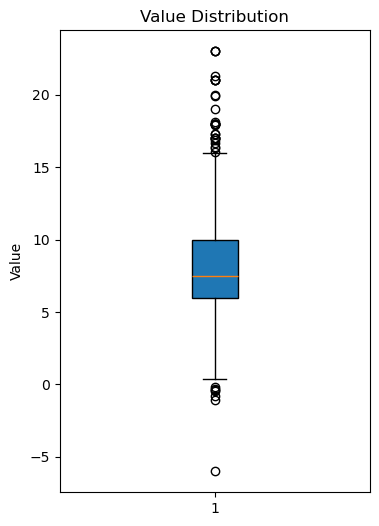

In [182]:
plt.figure(figsize=(4,6))
values_pm25 = dfposts_PM25_raw['value'].dropna() # If you don't remove NANs, default matplotlib function will fail
plt.boxplot(values_pm25, vert=True, patch_artist=True)
plt.title("Value Distribution")
plt.ylabel("Value")
plt.show()

In [183]:
pprint((dfposts_PM25['value'] < 0).sum())
pprint((dfposts_PM25['value'] > 0).sum())

np.int64(7)
np.int64(993)


According to the boxplot, we can conclude that their are negative measurements points. This might be due to callibration errors or sensor noise. It is therefore important to ignore the negative values so that it will not influence the possibel decisions the stakeholder should take

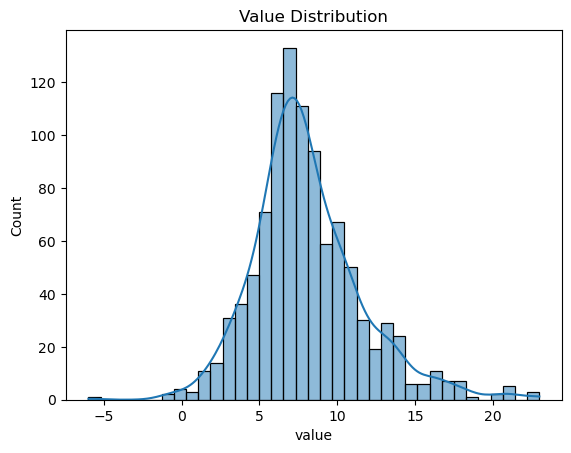

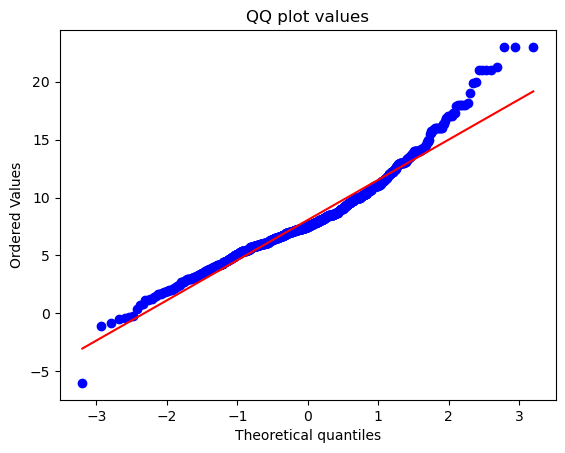

In [184]:
import scipy.stats as stats
import seaborn as sns 

sns.histplot(values_pm25, kde=True)
plt.title("Value Distribution")
plt.show()

stats.probplot(values_pm25, dist="norm", plot=plt)
plt.title("QQ plot values")
plt.show()

In [185]:
dfposts_PM25['value'].skew()

np.float64(0.8212028258489417)

In [186]:
c_pm25 = abs(values_pm25.min())
print(c_pm25)

6.0


In [187]:
print(values_pm25)

0      11.90
1      14.28
2       4.80
3      14.00
4       9.20
       ...  
995     7.70
996     7.40
997     1.27
998     7.00
999    10.00
Name: value, Length: 1000, dtype: float64


In [188]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt



shiftpm25 = values_pm25 + c_pm25 + 0.001
log_xpm25 = np.log(shiftpm25)  
print(log_xpm25)

0      2.884857
1      3.009684
2      2.379639
3      2.995782
4      2.721361
         ...   
995    2.617469
996    2.595329
997    1.983894
998    2.565026
999    2.772651
Name: value, Length: 1000, dtype: float64


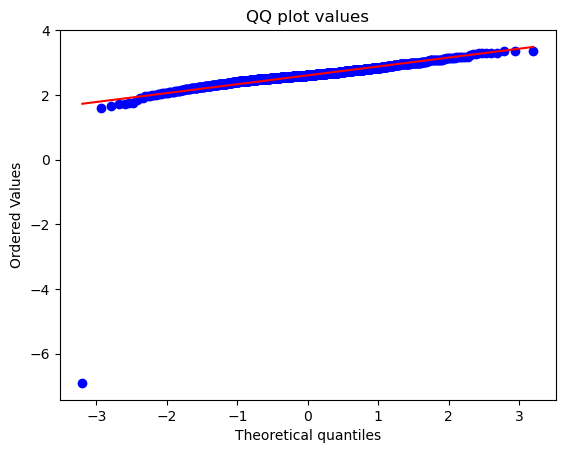

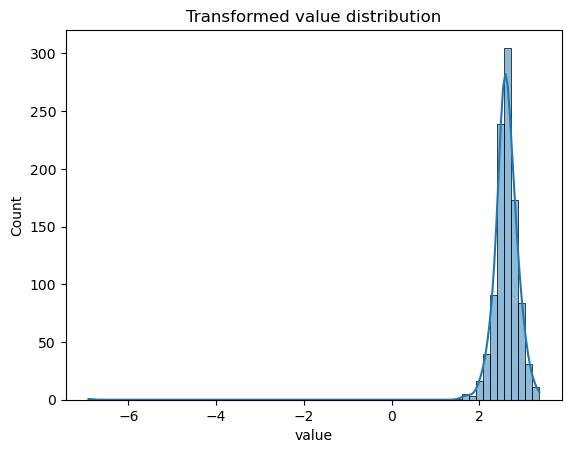

In [189]:
stats.probplot(log_xpm25, dist="norm", plot=plt)
plt.title("QQ plot values")
plt.show()

sns.histplot(log_xpm25,kde=True)
plt.title("Transformed value distribution")
plt.show()


In [190]:
log_xpm25.skew()

np.float64(-14.634172261462469)

The skewness transforms negatively, therefore we need to implement another transformation practice in order to detect and handle outliers.

In [191]:
dfposts_PM25_clean= dfposts_PM25.copy()

dfposts_PM25_clean['value']= dfposts_PM25_clean['value'].mask(dfposts_PM25_clean['value'] < 0, np.nan)

print((dfposts_PM25_clean['value'] < 0).sum())


0


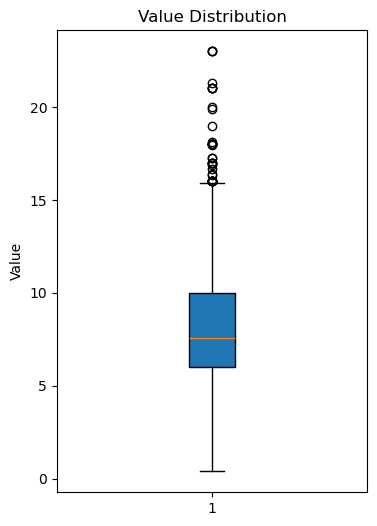

In [192]:
plt.figure(figsize=(4,6))
values_pm25_cleaned = dfposts_PM25_clean['value'].dropna() # If you don't remove NANs, default matplotlib function will fail
plt.boxplot(values_pm25_cleaned, vert=True, patch_artist=True)
plt.title("Value Distribution")
plt.ylabel("Value")
plt.show()

In [193]:
meanlocation_PM25_cleaned = dfposts_PM25_clean.groupby('station_number')['value'].mean().reset_index()

print(meanlocation_PM25_cleaned)

   station_number      value
0         NL01485   8.025000
1         NL01487  10.000000
2         NL01488   8.162500
3         NL01489   8.943750
4         NL01491   8.662500
..            ...        ...
58        NL50010  13.466667
59        NL50011  13.916667
60        NL50012  15.600000
61        NL54004   9.915000
62        NL54010   9.765625

[63 rows x 2 columns]


In [194]:
bar_pm25 = px.bar(meanlocation_PM25, x='station_number' , y= 'value', title='Average µg/m³ PM2.5 per station')
bar_pm25.update_layout(yaxis_title='PM 2.5 in µg/m³', xaxis_title= "Station numbers", barmode='group') 
#bar.add_shape(type='line', y0=40, y1=40, xref='paper', x0=0, x1=1, line_color='red')
bar_pm25.add_shape(
    legendrank=1,
    showlegend=True,
    type="line",
    xref="paper",
    line=dict(dash="5px", color='red'),
    x0=1,
    x1=0,
    y0=15,
    y1=15,
    name='Threshold of 15 µg/m³'
)

bar_pm25.show()

In [195]:
print(meanlocation_PM25['value'].mean())
print(meanlocation_PM25_cleaned['value'].mean())

8.139318394024277
8.189854308817544


In [196]:
bar_pm25_clean = px.bar(meanlocation_PM25_cleaned, x='station_number' , y= 'value', title='Average µg/m³ PM2.5 per station')
bar_pm25_clean.update_layout(yaxis_title='PM 2.5 in µg/m³', xaxis_title= "Station numbers", barmode='group') 
#bar.add_shape(type='line', y0=40, y1=40, xref='paper', x0=0, x1=1, line_color='red')
bar_pm25_clean.add_shape(
    legendrank=1,
    showlegend=True,
    type="line",
    xref="paper",
    line=dict(dash="5px", color='red'),
    x0=1,
    x1=0,
    y0=15,
    y1=15,
    name='Threshold of 15 µg/m³'
)

bar_pm25_clean.show()

In [197]:
raw = meanlocation_PM25.groupby('station_number')['value'].mean()
clean = meanlocation_PM25_cleaned.groupby('station_number')['value'].mean()

differencepm25_raw = np.setdiff1d(raw, clean )
differencepm25_clean = np.setdiff1d(clean, raw )
difference_mergepm25 = meanlocation_PM25.merge(meanlocation_PM25_cleaned, on='station_number')
print(differencepm25_raw, "Difference in raw value")
print(differencepm25_clean,"Difference after preprocessing" )
print(difference_mergepm25)

difference= difference_mergepm25[difference_mergepm25['value_x'] != difference_mergepm25['value_y']]
print(difference)

[3.0625     5.063125   5.54117647] Difference in raw value
[3.55       5.43133333 7.86923077] Difference after preprocessing
   station_number    value_x    value_y
0         NL01485   8.025000   8.025000
1         NL01487  10.000000  10.000000
2         NL01488   8.162500   8.162500
3         NL01489   8.943750   8.943750
4         NL01491   8.662500   8.662500
..            ...        ...        ...
58        NL50010  13.466667  13.466667
59        NL50011  13.916667  13.916667
60        NL50012  15.600000  15.600000
61        NL54004   9.915000   9.915000
62        NL54010   9.765625   9.765625

[63 rows x 3 columns]
   station_number   value_x   value_y
35        NL10937  5.063125  5.431333
43        NL49551  5.541176  7.869231
45        NL49556  3.062500  3.550000


Manually removing the NO2 only part and checking if len of the tuple is the same as the len of the intersection variable. If that's the case, the PM25 will be added to the tuple. We used the following link in order to manually link each station_numbers to its province: https://www.rivm.nl/lucht/meten-modelleren-berekenen/overschrijdingen. 


https://hollandse-luchten.org/kaart/?layers=meetvragen%7Cpm25%7Cwind&bounds=6.90754%7C52.2298%7C6.9314%7C52.24208

In [198]:
PM25_pvencoding = {'NL49703': 'Noord-Holland',
                  'NL49553': 'Noord-Holland',
                  'NL01493': 'Zuid-Holland',
                  'NL10404': 'Zuid-Holland',
                  'NL01912': 'Zeeland',
                  'NL10742': 'Groningen',
                  'NL10538': 'Noord-Holland',
                  'NL01496': 'Zuid-Holland',
                  'NL01495': 'Zuid-Holland', 
                  'NL49007': 'Noord-Holland',
                  'NL10636': 'Utrecht',
                  'NL10136': 'Limburg',
                  'NL01913': 'Zeeland',
                  'NL01487': 'Zuid-Holland',
                  'NL01497': 'Zeeland',
                  'NL10644': 'Utrecht',
                  'NL10741': 'Gelderland',
                  'NL10247':'Noord-Brabant', 
                  'NL10934': 'Friesland',
                  'NL01494': 'Zuid-Holland',
                  'NL10449': 'Zuid-Holland',
                  'NL49017': 'Noord-Holland',
                  'NL49551': 'Noord-Holland',
                  'NL10418':'Zuid-Holland',
                  'NL10138': 'Limburg',
                  'NL10450': 'Zuid-Holland',
                  'NL49561': 'Noord-Holland', 
                  'NL01485': 'Zuid-Holland',
                  'NL49003': 'Noord-Holland',
                  'NL10444': 'Zuid-Holland',  
                  'NL10738': 'Gelderland',
                  'NL49680': 'Flevoland', 
                  'NL10643': 'Zuid-Holland', 
                  'NL10248': 'Noord-Brabant', 
                  'NL10240': 'Noord-Holland', 
                  'NL10230': 'Noord-Brabant',
                  'NL10131': 'Limburg', 
                  'NL10938': 'Zuid-Holland',
                  'NL49014': 'Noord-Holland',
                  'NL10641': 'Utrecht', 
                  'NL01491': 'Zuid-Holland',
                  'NL10241': 'Noord-Brabant',
                  'NL49701': 'Noord-Holland',
                  'NL49012': 'Noord-Holland', 
                  'NL49704':'Noord-Holland',
                  'NL01488': 'Zuid-Holland', 
                  'NL10937': 'Groningen',
                  'NL50010': 'Limburg',
                  'NL50003': 'Limburg',
                  'NL54004':'Gelderland',
                  'NL01489': 'Zuid-Holland',
                  'NL10821': 'Overijssel', 
                  'NL49016': 'Noord-Holland',
                  'NL49556': 'Noord-Holland',
                  'NL49557': 'Noord-Holland',
                  'NL49570': 'Noord-Holland',
                  'NL49572': 'Noord-Holland',
                  'NL49573': 'Noord-Holland',
                  'NL49980': 'Groningen',
                  'NL50007': 'Limburg',
                  'NL50011': 'Limburg',
                  'NL50012': 'Limburg',
                  'NL54010': 'Gelderland' }



In [199]:
dfposts_PM25_raw['RegioS']  = dfposts_PM25_raw['station_number'].map(PM25_pvencoding)
meanprovince_pm25_raw = dfposts_PM25_raw.groupby('RegioS')['value'].mean().reset_index()

print(meanprovince_pm25_raw)


dfposts_PM25_clean['RegioS']  = dfposts_PM25_clean['station_number'].map(PM25_pvencoding)
meanprovince_pm25_clean = dfposts_PM25_clean.groupby('RegioS')['value'].mean().reset_index()

print("\n" , meanprovince_pm25_clean)


           RegioS      value
0       Flevoland   6.876471
1       Friesland   3.850000
2      Gelderland   9.003519
3       Groningen   7.707143
4         Limburg  12.168512
5   Noord-Brabant   9.379365
6   Noord-Holland   6.094675
7      Overijssel   5.512500
8         Utrecht   7.662292
9         Zeeland   8.369388
10   Zuid-Holland   8.551853

            RegioS      value
0       Flevoland   6.876471
1       Friesland   3.850000
2      Gelderland   9.003519
3       Groningen   7.877292
4         Limburg  12.168512
5   Noord-Brabant   9.379365
6   Noord-Holland   6.244901
7      Overijssel   5.512500
8         Utrecht   7.662292
9         Zeeland   8.369388
10   Zuid-Holland   8.551853


In [200]:
print(meanprovince_pm25_raw)
print('Mean PM2.5 value raw:', meanprovince_pm25_raw['value'].mean(), '\n')

print(meanprovince_pm25_clean)
print('Mean PM2.5 value cleaned:', meanprovince_pm25_clean['value'].mean())

           RegioS      value
0       Flevoland   6.876471
1       Friesland   3.850000
2      Gelderland   9.003519
3       Groningen   7.707143
4         Limburg  12.168512
5   Noord-Brabant   9.379365
6   Noord-Holland   6.094675
7      Overijssel   5.512500
8         Utrecht   7.662292
9         Zeeland   8.369388
10   Zuid-Holland   8.551853
Mean PM2.5 value raw: 7.7432470425684805 

           RegioS      value
0       Flevoland   6.876471
1       Friesland   3.850000
2      Gelderland   9.003519
3       Groningen   7.877292
4         Limburg  12.168512
5   Noord-Brabant   9.379365
6   Noord-Holland   6.244901
7      Overijssel   5.512500
8         Utrecht   7.662292
9         Zeeland   8.369388
10   Zuid-Holland   8.551853
Mean PM2.5 value cleaned: 7.7723719650321295


In [201]:
dfposts_PM25_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   formula             1000 non-null   object 
 1   station_number      1000 non-null   object 
 2   timestamp_measured  1000 non-null   object 
 3   value               1000 non-null   float64
 4   RegioS              1000 non-null   object 
dtypes: float64(1), object(4)
memory usage: 39.2+ KB


In [202]:
dfposts_PM25_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   formula             1000 non-null   object 
 1   station_number      1000 non-null   object 
 2   timestamp_measured  1000 non-null   object 
 3   value               993 non-null    float64
 4   RegioS              1000 non-null   object 
dtypes: float64(1), object(4)
memory usage: 39.2+ KB


In [203]:
import plotly.express as px
import plotly.graph_objects as go

pv = ['Groningen', 'Friesland', 'Drenthe', 'Overijssel', 'Gelderland', 'Flevoland',
      'Utrecht', 'Noord-Holland', 'Zuid-Holland', 'Noord-Brabant', 'Limburg', 'Zeeland' ]

pv_meanpm25 = meanprovince_pm25_raw[meanprovince_pm25_raw['RegioS'].isin(pv)]
bar_avgpm25_raw = px.bar(meanprovince_pm25_raw, x='RegioS' , y= meanprovince_pm25_raw['value'], title='Average µg/m³ PM2.5 per Region (raw data)')
bar_avgpm25_raw.update_layout(yaxis_title='PM2.5 in µg/m³', xaxis_title= "Station numbers", barmode='group') 
#bar.add_shape(type='line', y0=40, y1=40, xref='paper', x0=0, x1=1, line_color='red')
bar_avgpm25_raw.add_shape(
    legendrank=1,
    showlegend=True,
    type="line",
    xref="paper",
    line=dict(dash="5px", color='red'),
    x0=1,
    x1=0,
    y0=15,
    y1=15,
    name='Threshold of 15 µg/m³'
)

bar_avgpm25_raw.show()

In [204]:
import plotly.express as px
import plotly.graph_objects as go

pv = ['Groningen', 'Friesland', 'Drenthe', 'Overijssel', 'Gelderland', 'Flevoland',
      'Utrecht', 'Noord-Holland', 'Zuid-Holland', 'Noord-Brabant', 'Limburg', 'Zeeland' ]

pv_meanpm25 = meanprovince_pm25_clean[meanprovince_pm25_clean['RegioS'].isin(pv)]
bar_avgpm25_clean= px.bar(meanprovince_pm25_clean, x='RegioS' , y= meanprovince_pm25_clean['value'], title='Average µg/m³ PM2.5 per Region')
bar_avgpm25_clean.update_layout(yaxis_title='PM2.5 in µg/m³', xaxis_title= "Station numbers", barmode='group') 
#bar.add_shape(type='line', y0=40, y1=40, xref='paper', x0=0, x1=1, line_color='red')
bar_avgpm25_clean.add_shape(
    legendrank=1,
    showlegend=True,
    type="line",
    xref="paper",
    line=dict(dash="5px", color='red'),
    x0=1,
    x1=0,
    y0=15,
    y1=15,
    name='Threshold of 15 µg/m³'
)

bar_avgpm25_clean.show()

In [205]:

dfcorrelation_pm25 = pd.merge(meanprovince_pm25_clean, dfprovince, on='RegioS')

correlation_pm25 = dfcorrelation_pm25[['value', 'Sum']].corr()
corr_matrix_pm25 = go.Figure(data=go.Heatmap(
        z=correlation_pm25.values,
        x=correlation_pm25.columns,
        y=correlation_pm25.index,
        text=correlation_pm25.values, #Show the values in the heatmap
        texttemplate="%{text:.2f}",
        colorscale='Viridis')) #Create the heatmap figure

corr_matrix_pm25.show()

# API Luchtmeetnet PM10

In [206]:
url = "https://api.luchtmeetnet.nl/open_api/measurements?formula=PM10" # get data from luchtmeetnet api and filter it so that only PM10 formulas will be retrieved
posts_luchtmeetnet_PM10 = requests.get(url).json()
#pprint(posts_luchtmeetnet_PM10)

In [207]:
dfposts_PM10 = pd.DataFrame(posts_luchtmeetnet_PM10["data"])[['formula',
           'station_number',
           'timestamp_measured',
           'value']]
dfposts_PM10.head(10)

,formula,station_number,timestamp_measured,value
0,PM10,NL01912,2025-10-10T19:00:00+00:00,12.10
1,PM10,NL49980,2025-10-10T19:00:00+00:00,10.20
2,PM10,NL10450,2025-10-10T19:00:00+00:00,15.95
3,PM10,NL49012,2025-10-10T19:00:00+00:00,13.50
4,PM10,NL10133,2025-10-10T19:00:00+00:00,4.43
5,PM10,NL49556,2025-10-10T19:00:00+00:00,9.30
6,PM10,NL49572,2025-10-10T19:00:00+00:00,12.10
7,PM10,NL10641,2025-10-10T19:00:00+00:00,6.99
8,PM10,NL01913,2025-10-10T19:00:00+00:00,24.10
9,PM10,NL10738,2025-10-10T19:00:00+00:00,6.99


In [208]:
dfposts_PM10 = pd.DataFrame(posts_luchtmeetnet_PM10["data"])[['formula',
           'station_number',
           'timestamp_measured',
           'value']]
print(dfposts_PM10.head(10))



  formula station_number         timestamp_measured  value
0    PM10        NL01912  2025-10-10T19:00:00+00:00  12.10
1    PM10        NL49980  2025-10-10T19:00:00+00:00  10.20
2    PM10        NL10450  2025-10-10T19:00:00+00:00  15.95
3    PM10        NL49012  2025-10-10T19:00:00+00:00  13.50
4    PM10        NL10133  2025-10-10T19:00:00+00:00   4.43
5    PM10        NL49556  2025-10-10T19:00:00+00:00   9.30
6    PM10        NL49572  2025-10-10T19:00:00+00:00  12.10
7    PM10        NL10641  2025-10-10T19:00:00+00:00   6.99
8    PM10        NL01913  2025-10-10T19:00:00+00:00  24.10
9    PM10        NL10738  2025-10-10T19:00:00+00:00   6.99


In [209]:
dfposts_PM10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   formula             1000 non-null   object 
 1   station_number      1000 non-null   object 
 2   timestamp_measured  1000 non-null   object 
 3   value               1000 non-null   float64
dtypes: float64(1), object(3)
memory usage: 31.4+ KB


In [210]:
meanlocation_PM10 = dfposts_PM10.groupby('station_number')['value'].mean().reset_index()

print(meanlocation_PM10)

   station_number      value
0         NL01485  16.307692
1         NL01487  20.930769
2         NL01488  17.284615
3         NL01489  18.969231
4         NL01491  20.308333
..            ...        ...
77        NL50010  20.000000
78        NL50011  25.250000
79        NL50012  25.000000
80        NL54004  15.067500
81        NL54010  13.576667

[82 rows x 2 columns]


In [211]:
print(dfposts_PM10["station_number"].isna().sum())
print(dfposts_PM10["station_number"].nunique(), "station points")
print(dfposts_PM10["station_number"].unique())
print(dfposts_PM10["station_number"].value_counts())

0
82 station points
['NL01912' 'NL49980' 'NL10450' 'NL49012' 'NL10133' 'NL49556' 'NL49572'
 'NL10641' 'NL01913' 'NL10738' 'NL49701' 'NL49553' 'NL10437' 'NL01496'
 'NL49016' 'NL10633' 'NL10247' 'NL10639' 'NL10644' 'NL10241' 'NL10236'
 'NL01488' 'NL49704' 'NL10934' 'NL01494' 'NL01491' 'NL49546' 'NL10446'
 'NL49557' 'NL10722' 'NL10444' 'NL10230' 'NL10237' 'NL10248' 'NL10404'
 'NL49003' 'NL10246' 'NL10807' 'NL10138' 'NL49014' 'NL10818' 'NL49007'
 'NL10550' 'NL10918' 'NL49564' 'NL54004' 'NL49551' 'NL01495' 'NL10445'
 'NL49570' 'NL10449' 'NL10741' 'NL49017' 'NL49561' 'NL10442' 'NL49680'
 'NL54010' 'NL10538' 'NL01489' 'NL49703' 'NL10937' 'NL01493' 'NL10617'
 'NL10636' 'NL49020' 'NL49565' 'NL01487' 'NL10318' 'NL01497' 'NL10131'
 'NL49573' 'NL10418' 'NL10240' 'NL10136' 'NL10235' 'NL01485' 'NL50007'
 'NL50010' 'NL50012' 'NL10929' 'NL50011' 'NL50003']
station_number
NL01912    13
NL49556    13
NL01913    13
NL10133    13
NL10641    13
           ..
NL10633     9
NL50011     8
NL10318     8
NL5400

In [212]:
import numpy as np
uniqueNO2= dfposts_NO2['station_number'].unique()
print(uniqueNO2)

uniquePM10= dfposts_PM10['station_number'].unique()
print(uniquePM10)

intersection_pm10 = np.intersect1d(uniqueNO2, uniquePM10)

print(len(intersection_pm10))

differenceno2 = np.setdiff1d(uniqueNO2, uniquePM10)
differencepm10 = np.setdiff1d(uniquePM10, uniqueNO2)
print(differencepm25, 'PM10 only')
print(differenceno2, 'NO2 only')


['NL10230' 'NL10938' 'NL10617' 'NL01912' 'NL10444' 'NL10738' 'NL10818'
 'NL49680' 'NL10449' 'NL49703' 'NL10445' 'NL10741' 'NL01493' 'NL49561'
 'NL01488' 'NL10246' 'NL10442' 'NL10722' 'NL49020' 'NL10538' 'NL10133'
 'NL49021' 'NL49012' 'NL10404' 'NL01487' 'NL10131' 'NL10636' 'NL49017'
 'NL10248' 'NL54004' 'NL49565' 'NL10418' 'NL01496' 'NL10929' 'NL10807'
 'NL10633' 'NL01495' 'NL10237' 'NL10301' 'NL49014' 'NL49546' 'NL10918'
 'NL10236' 'NL49564' 'NL10639' 'NL49003' 'NL10550' 'NL10641' 'NL49704'
 'NL01489' 'NL10437' 'NL01913' 'NL10934' 'NL10450' 'NL10235' 'NL10136'
 'NL49551' 'NL10937' 'NL01491' 'NL10241' 'NL10240' 'NL10247' 'NL10318'
 'NL10138' 'NL49007' 'NL49701' 'NL10644' 'NL49002' 'NL10446' 'NL49022'
 'NL01494' 'NL01485' 'NL49553' 'NL10643' 'NL10107' 'NL01497' 'NL49019'
 'NL10742' 'NL50002' 'NL50010' 'NL50003']
['NL01912' 'NL49980' 'NL10450' 'NL49012' 'NL10133' 'NL49556' 'NL49572'
 'NL10641' 'NL01913' 'NL10738' 'NL49701' 'NL49553' 'NL10437' 'NL01496'
 'NL49016' 'NL10633' 'NL10247' 'NL1

https://hollandse-luchten.org/kaart/?layers=meetvragen%7Cpm10%7Cwind&bounds=4.98381%7C52.05999%7C5.26815%7C52.2067

In [213]:
PM10_pvencoding = {'NL49703': 'Noord-Holland',
                  'NL49553': 'Noord-Holland',
                  'NL01493': 'Zuid-Holland',
                  'NL10404': 'Zuid-Holland',
                  'NL10318': 'Zeeland',
                  'NL01912': 'Zeeland',
                  'NL10538': 'Noord-Holland',
                  'NL01496': 'Zuid-Holland',
                  'NL01495': 'Zuid-Holland', 
                  'NL49007': 'Noord-Holland',
                  'NL10636': 'Utrecht',
                  'NL49564': 'Noord-Holland',
                  'NL10818': 'Overijssel',
                  'NL10550': 'Noord-Holland',
                  'NL49546': 'Noord-Holland',
                  'NL10136': 'Limburg',
                  'NL10235': 'Noord-Brabant',
                  'NL01913': 'Zeeland',
                  'NL10918': 'Friesland',
                  'NL01487': 'Zuid-Holland',
                  'NL10639': 'Utrecht',
                  'NL01497': 'Zeeland',
                  'NL10644': 'Utrecht',
                  'NL10633': 'Utrecht',
                  'NL10741': 'Gelderland',
                  'NL10437': 'Zeeland',
                  'NL10247':'Noord-Brabant', 
                  'NL10445':'Zeeland',
                  'NL10934': 'Friesland',
                  'NL01494': 'Zuid-Holland',
                  'NL10449': 'Zuid-Holland',
                  'NL49017': 'Noord-Holland',
                  'NL49551': 'Noord-Holland',
                  'NL10617': 'Flevoland', 
                  'NL10442': 'Zuid-Holland',
                  'NL10446': 'Zuid-Holland',
                  'NL49565': 'Noord-Holland',
                  'NL10418':'Zuid-Holland',
                  'NL10138': 'Limburg',
                  'NL10450': 'Zuid-Holland',
                  'NL10929': 'Drenthe',
                  'NL49561': 'Noord-Holland', 
                  'NL01485': 'Zuid-Holland',
                  'NL49003': 'Noord-Holland',
                  'NL10246': 'Noord-Brabant', 
                  'NL10133': 'Limburg',
                  'NL49020': 'Noord-Holland', 
                  'NL10444': 'Zuid-Holland',  
                  'NL10738': 'Gelderland',
                  'NL49680': 'Flevoland', 
                  'NL10248': 'Noord-Brabant', 
                  'NL10240': 'Noord-Holland', 
                  'NL10230': 'Noord-Brabant',
                  'NL10131': 'Limburg', 
                  'NL49014': 'Noord-Holland',
                  'NL10641': 'Utrecht', 
                  'NL01491': 'Zuid-Holland',
                  'NL10236': 'Noord-Brabant',
                  'NL10241': 'Noord-Brabant',
                  'NL49701': 'Noord-Holland',
                  'NL49012': 'Noord-Holland', 
                  'NL10722': 'Gelderland',
                  'NL49704':'Noord-Holland',
                  'NL10807': 'Overijssel',
                  'NL01488': 'Zuid-Holland', 
                  'NL10937': 'Groningen',
                  'NL50010': 'Limburg', 
                  'NL50003': 'Limburg',
                  'NL54004':'Gelderland',
                  'NL01489': 'Zuid-Holland', 
                  'NL10821': 'Overijssel', 
                  'NL49016': 'Noord-Holland' ,
                  'NL49556': 'Noord-Holland', 
                  'NL49557': 'Noord-Holland', 
                  'NL49570': 'Noord-Holland',
                  'NL49572': 'Noord-Holland', 
                  'NL49573': 'Noord-Holland',
                  'NL49980': 'Groningen', 
                  'NL50007': 'Limburg', 
                  'NL50011': 'Limburg',  
                  'NL50012': 'Limburg', 
                  'NL54010': 'Gelderland'}

In [214]:
len(PM10_pvencoding)

82

In [215]:
bar_pm10 = px.bar(meanlocation_PM10, x='station_number' , y= 'value', title='Average µg/m³ PM10 per station')
bar_pm10.update_layout(yaxis_title='PM10 in µg/m³', xaxis_title= "Station numbers", barmode='group') 
#bar.add_shape(type='line', y0=40, y1=40, xref='paper', x0=0, x1=1, line_color='red')
bar_pm10.add_shape(
    legendrank=1,
    showlegend=True,
    type="line",
    xref="paper",
    line=dict(dash="5px", color='red'),
    x0=1,
    x1=0,
    y0=15,
    y1=15,
    name='Threshold of 15 µg/m³'
)

bar_pm10.show()

In [216]:
dfposts_PM10['RegioS']  = dfposts_PM10['station_number'].map(PM25_pvencoding)
meanprovince_pm10 = dfposts_PM10.groupby('RegioS')['value'].mean().reset_index()

print(meanprovince_pm10)


          RegioS      value
0      Flevoland  13.038462
1      Friesland  14.670000
2     Gelderland  14.243077
3      Groningen  15.494800
4        Limburg  18.335761
5  Noord-Brabant  14.669388
6  Noord-Holland  14.418661
7        Utrecht  10.931053
8        Zeeland  15.561538
9   Zuid-Holland  15.211292


In [217]:
dfposts_PM10_raw = dfposts_PM10.copy()

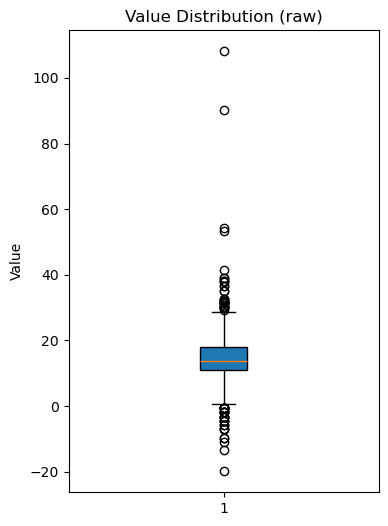

In [218]:
plt.figure(figsize=(4,6))
values_pm10_raw = dfposts_PM10_raw['value'].dropna() # If you don't remove NANs, default matplotlib function will fail
plt.boxplot(values_pm10_raw, vert=True, patch_artist=True)
plt.title("Value Distribution (raw)")
plt.ylabel("Value")
plt.show()

In [219]:
pprint((dfposts_PM10_raw['value'] < 0).sum())
pprint((dfposts_PM25_raw['value'] > 0).sum())

np.int64(34)
np.int64(993)


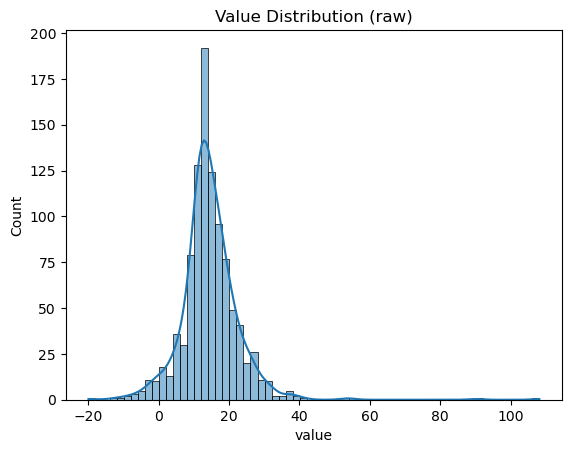

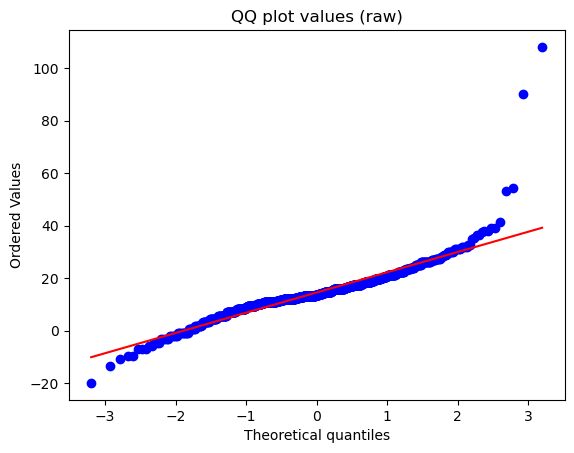

In [220]:
import scipy.stats as stats
import seaborn as sns 

sns.histplot(values_pm10_raw, kde=True)
plt.title("Value Distribution (raw)")
plt.show()

stats.probplot(values_pm10_raw, dist="norm", plot=plt)
plt.title("QQ plot values (raw)")
plt.show()

In [221]:
values_pm10_raw.skew()

np.float64(2.302482632471133)

In [222]:
c_pm10 = abs(values_pm10_raw.min())

In [223]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt



shiftpm10 = values_pm10_raw + c_pm10 + 0.001
log_xpm10 = np.log(shiftpm10)  
print(log_xpm10)

0      3.465455
1      3.404226
2      3.579092
3      3.508286
4      3.191340
         ...   
995    3.658188
996    3.462324
997    2.192882
998    4.077385
999    3.703546
Name: value, Length: 1000, dtype: float64


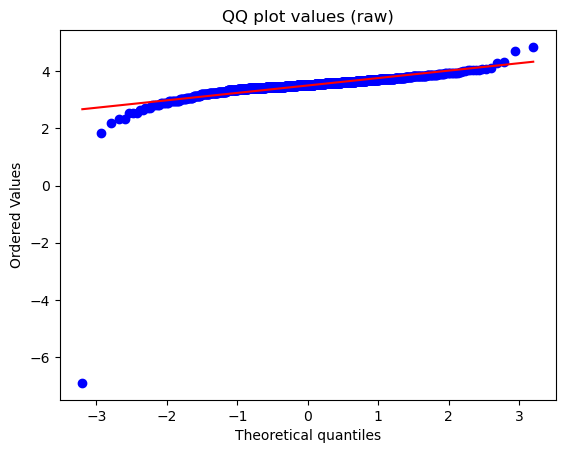

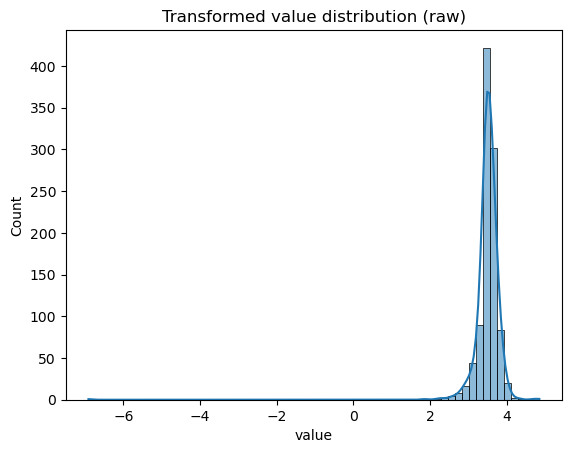

In [224]:
stats.probplot(log_xpm10, dist="norm", plot=plt)
plt.title("QQ plot values (raw)")
plt.show()

sns.histplot(log_xpm10,kde=True)
plt.title("Transformed value distribution (raw)")
plt.show()


In [225]:
log_xpm10.skew()

np.float64(-16.890308350516992)

In [226]:
dfposts_PM10_clean= dfposts_PM10.copy()

dfposts_PM10_clean['value']= dfposts_PM10_clean['value'].mask(dfposts_PM10_clean['value'] < 0, np.nan)

print((dfposts_PM10_clean['value'] < 0).sum())


0


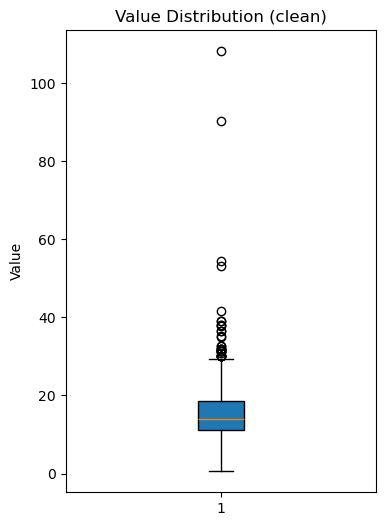

In [227]:
plt.figure(figsize=(4,6))
values_pm10_cleaned = dfposts_PM10_clean['value'].dropna() # If you don't remove NANs, default matplotlib function will fail
plt.boxplot(values_pm10_cleaned, vert=True, patch_artist=True)
plt.title("Value Distribution (clean)")
plt.ylabel("Value")
plt.show()

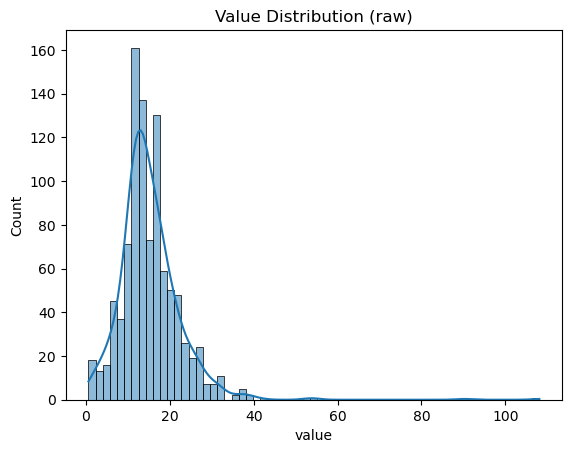

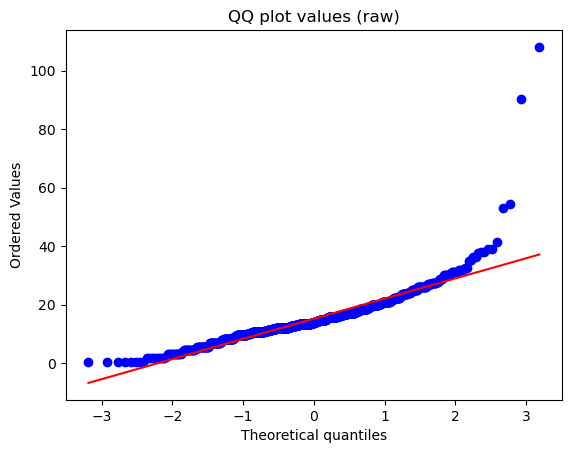

In [228]:
import scipy.stats as stats
import seaborn as sns 

sns.histplot(values_pm10_cleaned, kde=True)
plt.title("Value Distribution (raw)")
plt.show()

stats.probplot(values_pm10_cleaned, dist="norm", plot=plt)
plt.title("QQ plot values (raw)")
plt.show()

In [229]:
print(values_pm10_cleaned.skew())
print(values_pm10_raw.skew())

3.4602323213643684
2.302482632471133


In [230]:


import numpy as np
from scipy import stats
import matplotlib.pyplot as plt


log_xpm10_clean = np.log(values_pm10_cleaned) + 0.001  
print(log_xpm10_clean)

0      2.494205
1      2.323388
2      2.770459
3      2.603690
4      1.489400
         ...   
994    3.048850
995    2.940162
996    2.485907
998    3.667122
999    3.031134
Name: value, Length: 966, dtype: float64


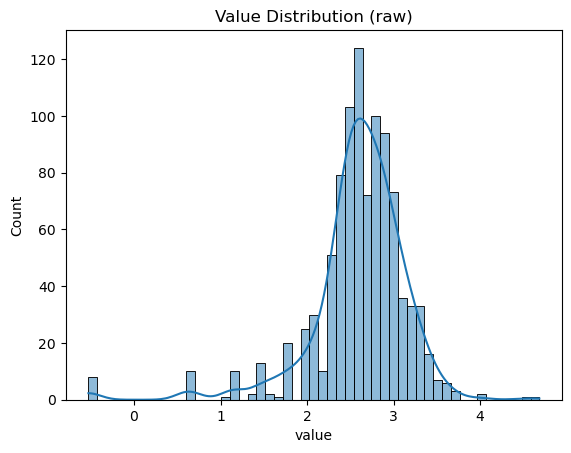

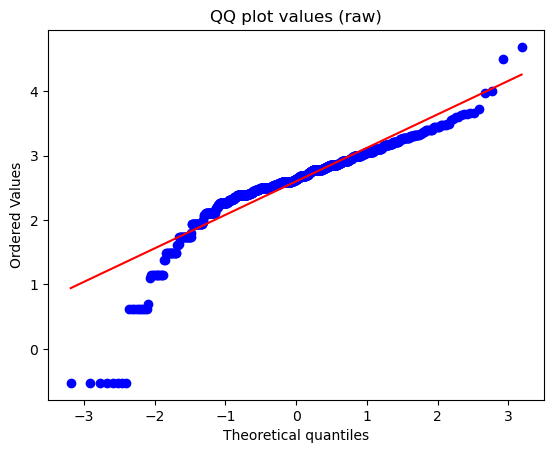

In [231]:
import scipy.stats as stats
import seaborn as sns 

sns.histplot(log_xpm10_clean, kde=True)
plt.title("Value Distribution (raw)")
plt.show()

stats.probplot(log_xpm10_clean, dist="norm", plot=plt)
plt.title("QQ plot values (raw)")
plt.show()

In [232]:
log_xpm10_clean.skew()

np.float64(-1.9338741424652137)

In [233]:
dfposts_PM10_raw['RegioS']  = dfposts_PM10_raw['station_number'].map(PM10_pvencoding)
meanprovince_pm10_raw = dfposts_PM10_raw.groupby('RegioS')['value'].mean().reset_index()

print(meanprovince_pm10_raw)


dfposts_PM10_clean['RegioS']  = dfposts_PM10_clean['station_number'].map(PM10_pvencoding)
meanprovince_pm10_clean = dfposts_PM10_clean.groupby('RegioS')['value'].mean().reset_index()

print("\n" , meanprovince_pm10_clean)


           RegioS      value
0         Drenthe   2.510000
1       Flevoland  11.392692
2       Friesland  12.750000
3      Gelderland  14.079038
4       Groningen  15.494800
5         Limburg  18.150095
6   Noord-Brabant  15.862386
7   Noord-Holland  14.136799
8      Overijssel   9.089200
9         Utrecht  12.199825
10        Zeeland  14.216986
11   Zuid-Holland  14.917635

            RegioS      value
0         Drenthe   7.843333
1       Flevoland  11.876000
2       Friesland  14.781304
3      Gelderland  15.322857
4       Groningen  15.494800
5         Limburg  18.959604
6   Noord-Brabant  16.506824
7   Noord-Holland  14.202848
8      Overijssel  10.480909
9         Utrecht  13.486604
10        Zeeland  14.874143
11   Zuid-Holland  15.813949


In [234]:
meanlocation_PM10_cleaned = dfposts_PM10_clean.groupby('station_number')['value'].mean().reset_index()

print(meanlocation_PM10_cleaned)

   station_number      value
0         NL01485  16.307692
1         NL01487  20.930769
2         NL01488  17.284615
3         NL01489  18.969231
4         NL01491  20.308333
..            ...        ...
77        NL50010  20.000000
78        NL50011  25.250000
79        NL50012  25.000000
80        NL54004  15.067500
81        NL54010  13.576667

[82 rows x 2 columns]


In [235]:
rawpm10 = meanlocation_PM10.groupby('station_number')['value'].mean()
cleanpm10 = meanlocation_PM10_cleaned.groupby('station_number')['value'].mean()

differencepm10_raw = np.setdiff1d(rawpm10, cleanpm10 )
differencepm10_clean = np.setdiff1d(cleanpm10, rawpm10 )
difference_mergepm10 = meanlocation_PM10.merge(meanlocation_PM10_cleaned, on='station_number')
print(differencepm10_raw, "Difference in raw value")
print(differencepm10_clean,"Difference after preprocessing" )
print(difference_mergepm10)

differencepm10= difference_mergepm10[difference_mergepm10['value_x'] != difference_mergepm10['value_y']]
print(differencepm10)

[ 2.51        8.69666667  9.01666667  9.23        9.25461538  9.74692308
 11.32230769 11.61769231 12.40538462 12.80818182 13.58692308 13.71
 13.88230769 14.27615385 14.67       16.73769231 17.51444444 19.44090909] Difference in raw value
[ 7.84333333 10.61666667 11.47       11.76090909 12.32333333 12.43
 12.67888889 13.60333333 13.85545455 14.286      15.52333333 16.76454545
 16.88090909 17.71       18.04454545 18.72333333 19.918      21.07
 21.582     ] Difference after preprocessing
   station_number    value_x    value_y
0         NL01485  16.307692  16.307692
1         NL01487  20.930769  20.930769
2         NL01488  17.284615  17.284615
3         NL01489  18.969231  18.969231
4         NL01491  20.308333  20.308333
..            ...        ...        ...
77        NL50010  20.000000  20.000000
78        NL50011  25.250000  25.250000
79        NL50012  25.000000  25.000000
80        NL54004  15.067500  15.067500
81        NL54010  13.576667  13.576667

[82 rows x 3 columns]
   stat

In [236]:
bar_pm10 = px.bar(meanlocation_PM10, x='station_number' , y= 'value', title='Average µg/m³ PM2.5 per station (raw)')
bar_pm10.update_layout(yaxis_title='PM 2.5 in µg/m³', xaxis_title= "Station numbers", barmode='group') 
#bar.add_shape(type='line', y0=40, y1=40, xref='paper', x0=0, x1=1, line_color='red')
bar_pm10.add_shape(
    legendrank=1,
    showlegend=True,
    type="line",
    xref="paper",
    line=dict(dash="5px", color='red'),
    x0=1,
    x1=0,
    y0=15,
    y1=15,
    name='Threshold of 15 µg/m³'
)

bar_pm10.show()

bar_pm10_cleaned = px.bar(meanlocation_PM10_cleaned, x='station_number' , y= 'value', title='Average µg/m³ PM2.5 per station (clean)')
bar_pm10_cleaned.update_layout(yaxis_title='PM 2.5 in µg/m³', xaxis_title= "Station numbers", barmode='group') 
#bar.add_shape(type='line', y0=40, y1=40, xref='paper', x0=0, x1=1, line_color='red')
bar_pm10_cleaned.add_shape(
    legendrank=1,
    showlegend=True,
    type="line",
    xref="paper",
    line=dict(dash="5px", color='red'),
    x0=1,
    x1=0,
    y0=15,
    y1=15,
    name='Threshold of 15 µg/m³'
)

bar_pm10_cleaned.show()

In [237]:
print(meanprovince_pm10_raw)
print('Mean PM2.5 value raw:', meanprovince_pm25_raw['value'].mean(), '\n')

print(meanprovince_pm10_clean)
print('Mean PM2.5 value cleaned:', meanprovince_pm10_clean['value'].mean())

           RegioS      value
0         Drenthe   2.510000
1       Flevoland  11.392692
2       Friesland  12.750000
3      Gelderland  14.079038
4       Groningen  15.494800
5         Limburg  18.150095
6   Noord-Brabant  15.862386
7   Noord-Holland  14.136799
8      Overijssel   9.089200
9         Utrecht  12.199825
10        Zeeland  14.216986
11   Zuid-Holland  14.917635
Mean PM2.5 value raw: 7.7432470425684805 

           RegioS      value
0         Drenthe   7.843333
1       Flevoland  11.876000
2       Friesland  14.781304
3      Gelderland  15.322857
4       Groningen  15.494800
5         Limburg  18.959604
6   Noord-Brabant  16.506824
7   Noord-Holland  14.202848
8      Overijssel  10.480909
9         Utrecht  13.486604
10        Zeeland  14.874143
11   Zuid-Holland  15.813949
Mean PM2.5 value cleaned: 14.136931202960762


In [238]:
import plotly.express as px
import plotly.graph_objects as go

pv = ['Groningen', 'Friesland', 'Drenthe', 'Overijssel', 'Gelderland', 'Flevoland',
      'Utrecht', 'Noord-Holland', 'Zuid-Holland', 'Noord-Brabant', 'Limburg', 'Zeeland' ]

pv_meanpm10pv = meanprovince_pm10_raw[meanprovince_pm10_raw['RegioS'].isin(pv)]
bar_pm10pv = px.bar(meanprovince_pm10_raw, x='RegioS' , y= dfposts_PM10_raw.groupby('RegioS')['value'].mean(), title='Average µg/m³ PM10 per Region')
bar_pm10pv.update_layout(yaxis_title='PM10 in µg/m³', xaxis_title= "Provinces", barmode='group') 
#bar.add_shape(type='line', y0=40, y1=40, xref='paper', x0=0, x1=1, line_color='red')
bar_pm10pv.add_shape(
    legendrank=1,
    showlegend=True,
    type="line",
    xref="paper",
    line=dict(dash="5px", color='red'),
    x0=1,
    x1=0,
    y0=15,
    y1=15,
    name='Threshold of 15 µg/m³'
)

bar_pm10pv.show()



pv_meanpm10_cleaned = meanprovince_pm10_clean[meanprovince_pm10_clean['RegioS'].isin(pv)]
bar_pm10pv_cleaned = px.bar(meanprovince_pm10_clean, x='RegioS' , y= dfposts_PM10_clean.groupby('RegioS')['value'].mean(), title='Average µg/m³ PM10 per Region (clean)')
bar_pm10pv_cleaned.update_layout(yaxis_title='PM10 in µg/m³', xaxis_title= "Provinces", barmode='group') 
#bar.add_shape(type='line', y0=40, y1=40, xref='paper', x0=0, x1=1, line_color='red')
bar_pm10pv_cleaned.add_shape(
    legendrank=1,
    showlegend=True,
    type="line",
    xref="paper",
    line=dict(dash="5px", color='red'),
    x0=1,
    x1=0,
    y0=15,
    y1=15,
    name='Threshold of 15 µg/m³'
)

bar_pm10pv_cleaned.show()

In [239]:

dfcorrelation_pm10 = pd.merge(meanprovince_pm10_clean, dfprovince, on='RegioS')

correlation_pm10 = dfcorrelation_pm10[['value', 'Sum']].corr()
corr_matrix_pm10 = go.Figure(data=go.Heatmap(
        z=correlation_pm10.values,
        x=correlation_pm10.columns,
        y=correlation_pm10.index,
        text=correlation_pm10.values, #Show the values in the heatmap
        texttemplate="%{text:.2f}",
        colorscale='Viridis')) #Create the heatmap figure

corr_matrix_pm10.show()

###### https://stackoverflow.com/questions/70563254/map-of-a-country-with-plotly

In [240]:
!pip install dash

In [241]:
from dash import Dash, dcc, html, Input, Output
import plotly.express as px

app = Dash(__name__)

app.layout = html.Div([
    html.H4('Air quality'),
    dcc.Dropdown(
        id="dropdown",
        options=["PM10", "PM2.5", "NO2"],
        value="PM10",
        clearable=False,
    ),
    dcc.Graph(id="graph"),
])

@app.callback(
    Output("graph", "figure"),
    Input("dropdown", "value"))
def update_bar_chart(typepolution):
    if typepolution=="PM10":
        return bar_pm10pv_cleaned
    elif typepolution=="PM2.5":
        return bar_avgpm25_clean
    if typepolution=="NO2":
        return bar_cleanno2


app.run(debug=True)

# To DO:
* Check the negative values. Probably measurement errors, ignore them during the calculation --> Check its impact on distribution
  * Provide comprhensive explanation about the code and provide good reasoning
* Make visualization for the following:
  * Barchart for sum location number for each province
  * Check threshold values hourly for PM10, PM2.5 and NO2
